# 1. Data set up


In [ ]:
#Downloading files
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

id = '1EaRFFYNvQmo1fyCI4Cf9Kmjf9AV34avN'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('TRD.csv')
#https://drive.google.com/file/d/1EaRFFYNvQmo1fyCI4Cf9Kmjf9AV34avN/view?usp=sharing

id = '1_b3kqv4GBkgNlQRX3zLd0tPmru6aXIz_'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('ICMLA.csv')
#https://drive.google.com/file/d/1_b3kqv4GBkgNlQRX3zLd0tPmru6aXIz_/view?usp=sharing

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/__init__.py", line 36, in autodetect
    from google.appengine.api import memcache
ModuleNotFoundError: No module named 'google.appengine'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 33, in <module>
    from oauth2client.contrib.locked_file import LockedFile
ModuleNotFoundError: No module named 'oauth2client.contrib.locked_file'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 37, in <module>
    from oauth2client.locked_file import LockedFile
ModuleNotFoundError: No module named 'oauth2client.locked_file'

During handling of the above exception, another exceptio

## 1.1 Load Data

*Please upload both datasets (any file format is ok) to your google drive, and load the datasets through google drive file id in your code. If you want to use Jupyter, please submit all the dataset in an additional zip file.*



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#load dataset
TRD_URL='/content/TRD.csv'
ICMLA_URL='/content/ICMLA.csv'

TR_df=pd.read_csv(TRD_URL)
ICMLA_df=pd.read_csv(ICMLA_URL)

TR_df


User ID  Category 1  Category 2  ...  Category 8  Category 9  Category 10
0      User 1        0.93        1.80  ...        2.79        1.82         2.42
1      User 2        1.02        2.20  ...        2.63        1.86         2.32
2      User 3        1.22        0.80  ...        2.80        1.31         2.50
3      User 4        0.45        1.80  ...        2.96        1.57         2.86
4      User 5        0.51        1.20  ...        2.78        1.18         2.54
..        ...         ...         ...  ...         ...         ...          ...
975  User 976        0.74        1.12  ...        2.78        0.99         3.20
976  User 977        1.25        0.92  ...        2.79        1.34         2.80
977  User 978        0.61        1.32  ...        2.81        1.34         3.02
978  User 979        0.93        0.20  ...        2.98        1.12         2.46
979  User 980        0.93        0.56  ...        2.87        1.34         2.40

[980 rows x 11 columns]

In [ ]:
ICMLA_df

paper_id  ...                                            session
0           1  ...                                   Ensemble Methods
1           2  ...                                   Ensemble Methods
2           3  ...                                   Ensemble Methods
3           4  ...                                   Ensemble Methods
4           5  ...                                   Ensemble Methods
..        ...  ...                                                ...
100       101  ...  Machine Learning in Visual Information Processing
101       102  ...  Machine Learning in Visual Information Processing
102       103  ...  Machine learning of graphical models in static...
103       104  ...  Machine learning of graphical models in static...
104       105  ...  Machine learning of graphical models in static...

[105 rows x 5 columns]

## 1.2 Data Preprocessing (optional)

***You are required to show your data preprocessing methods for the two datasets (if necessary)***

*You can apply different data preprocessing techniques in different data and clustering models if you need.*


### Travel Review Dataset

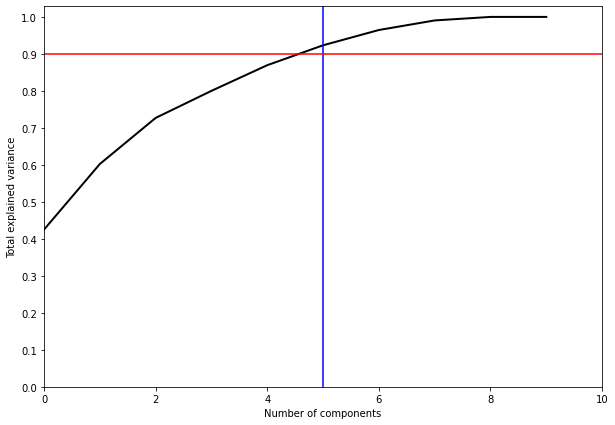

In [ ]:
tr_featruess=TR_df.iloc[:,1:]
tr_label=TR_df.iloc[:,0]
from sklearn import decomposition
pca = decomposition.PCA().fit(tr_featruess)
# show pcs infomation
plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 10)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(5, c='b')
plt.axhline(0.9, c='r')
plt.show();

In [ ]:
# PCA process accoridng to above graph
pca = decomposition.PCA(n_components=5)
X_centered = tr_featruess - tr_featruess.mean(axis=0)
pca.fit(X_centered)
tr_pca = pca.transform(X_centered)
tr_pca


array([[ 1.39140784, -0.06325254,  0.40005047,  0.42962888,  0.27693074],
       [ 2.22564886,  0.66056077,  0.42539237,  0.29555622,  0.28336852],
       [-0.67726766, -0.51264503, -0.41372553,  0.0757591 ,  0.55338622],
       ...,
       [-0.27318478,  0.21082073, -0.05201853, -0.43112427, -0.36344248],
       [-1.50784123, -1.24834691, -0.59030319, -0.17083933, -0.02598964],
       [ 0.436563  ,  0.11913389, -0.95334309, -0.2093523 , -0.05210221]])

### ICMLA Datasets

In [ ]:
###Synopsis data preprocessing
import nltk
from nltk.stem.snowball import SnowballStemmer
import re #regular expressions
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

stemmer = SnowballStemmer("english")
nltk.download('punkt')
def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

# combine 3 columns into one column
ICMLA_df['combined']=ICMLA_df.apply(lambda x:'%s _ %s _ %s' % (x['paper_title'],x['author_keywords'],x['abstract']),axis=1)
ICMLA_X=ICMLA_df['combined']

tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=20000,
                                 min_df=0.01, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,3))

tfidf_matrix = tfidf_vectorizer.fit_transform(ICMLA_X)

ICMLA_Y=ICMLA_df['session']
ICMLA_Y_unique=ICMLA_Y.unique()
print('The number of clusters',ICMLA_Y_unique.shape)
tfidf_matrix
# X_ICMLA_train, X_ICMLA_test, y_ICMLA_train, y_ICMLA_test = train_test_split( tfidf_matrix, ICMLA_Y, test_size=0.33, random_state=42)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


The number of clusters (24,)


<105x1475 sparse matrix of type '<class 'numpy.float64'>'
	with 6836 stored elements in Compressed Sparse Row format>

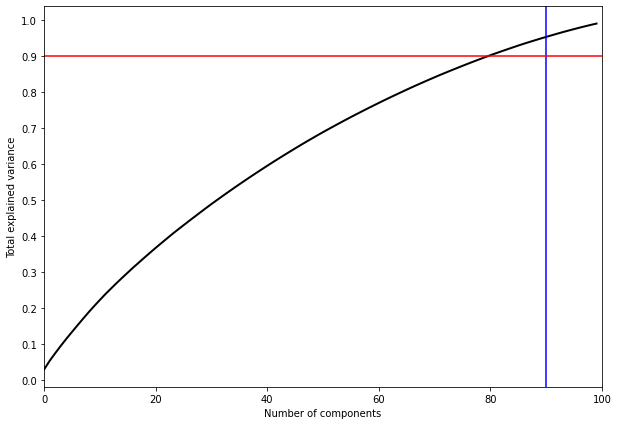

In [ ]:
tfidf_featruess=tfidf_matrix.toarray()
tfidf_label=ICMLA_Y
from sklearn import decomposition
X_centered = tfidf_featruess - tfidf_featruess.mean(axis=0)
svd = decomposition.TruncatedSVD(n_components=100).fit(X_centered)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(svd.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 100)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(90, c='b')
plt.axhline(0.9, c='r')
plt.show();

In [ ]:
pca.explained_variance_ratio_

array([0.4252009 , 0.17723144, 0.12453292, 0.07318609, 0.06934675])

In [ ]:
svd = decomposition.TruncatedSVD(n_components=90)
X_centered = tfidf_featruess - tfidf_featruess.mean(axis=0)
svd.fit(X_centered)
tfidf_svd =svd.transform(X_centered)
tfidf_svd.shape

tfidf_matrix=tfidf_svd

In [ ]:
tfidf_matrix.shape

(105, 90)

In [ ]:
# using google universal-sentence-encoder to embeding the sentence instead of tfidf
# refenrence of https://colab.research.google.com/github/tensorflow/hub/blob/master/examples/colab/semantic_similarity_with_tf_hub_universal_encoder.ipynb
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import seaborn as sns

module_url = "https://tfhub.dev/google/universal-sentence-encoder/4" 
model = hub.load(module_url)
print ("module %s loaded" % module_url)
def embed(input):
  return model(input)
message_embeddings = embed(ICMLA_X)


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


In [ ]:
message_embeddings

<tf.Tensor: shape=(105, 512), dtype=float32, numpy=
array([[-0.04883837, -0.06015687, -0.00193392, ...,  0.06016026,
        -0.04507872, -0.0562009 ],
       [-0.04533165, -0.06282185,  0.04259642, ...,  0.06301458,
         0.03644517, -0.01595698],
       [-0.0481673 , -0.05604396, -0.04671611, ...,  0.05664196,
        -0.05629814, -0.03846485],
       ...,
       [ 0.04108002,  0.00569648, -0.02110772, ..., -0.00639556,
        -0.0639171 , -0.0517859 ],
       [ 0.02922934, -0.03638013, -0.05966173, ...,  0.04547914,
        -0.0449881 , -0.02378068],
       [ 0.02541137,  0.0357399 , -0.02896642, ...,  0.06830345,
        -0.06486312, -0.05844114]], dtype=float32)>



---


# 2. K-means Clustering

## 2.1 Travel Review Dataset

### Train K-means clustering

In [ ]:
# Our path is clear, k=2 is optimal. using euclidean similarity measurement method
from sklearn.cluster import KMeans
k=2
kmeans = KMeans(n_clusters=k)
kmeans.fit(tr_pca)
y_kmeans = kmeans.predict(tr_pca)


In [ ]:
# using cosine_distance similarity measurement method
from nltk.cluster import KMeansClusterer, euclidean_distance,cosine_distance

clusterer = KMeansClusterer(k, cosine_distance)
clusters = clusterer.cluster(tr_pca,True)
# print("Clustered:", tr_pca)
print("As:", clusters)
print("Means:", clusterer.means())

As: [1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,

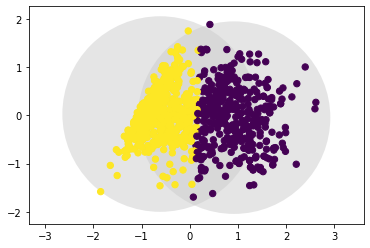

In [ ]:
from scipy.spatial.distance import cdist

# if we want to see the plot in 2D  ,we should use PCA to reduce the  features to 2 dimensions 
# 
def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)

    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

kmeans=KMeans(n_clusters=2, random_state=42)

# using PCA to get 2 dimensions of the all features 
pca_2 = decomposition.PCA(n_components=2)
X_centered = tr_featruess - tr_featruess.mean(axis=0)
pca_2.fit(X_centered)
tr_pca_2 = pca_2.transform(X_centered)

plot_kmeans(kmeans,tr_pca_2)

### First evaluation 

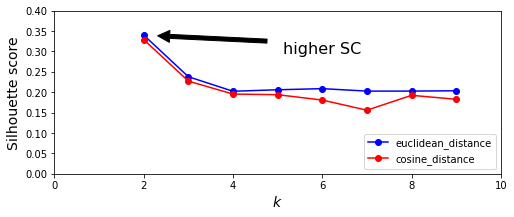

In [ ]:
from sklearn.metrics import silhouette_score

kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(tr_pca)
                for k in range(1, 10)]

kmeans_per_k_cos = [KMeansClusterer(k, cosine_distance).cluster(tr_pca,True)
                for k in range(1, 10)]
               

silhouette_scores = [silhouette_score(tr_pca, model.labels_)
                     for model in kmeans_per_k[1:]]

silhouette_scores_cos = [silhouette_score(tr_pca, model)
                     for model in kmeans_per_k_cos[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.plot(range(2, 10), silhouette_scores_cos, "ro-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([0, 10, 0, 0.4])

plt.annotate('higher SC',
             xy=(2, silhouette_scores[0]),
             xytext=(0.55, 0.75),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )

plt.legend(['euclidean_distance','cosine_distance'],loc='lower right')
plt.show()

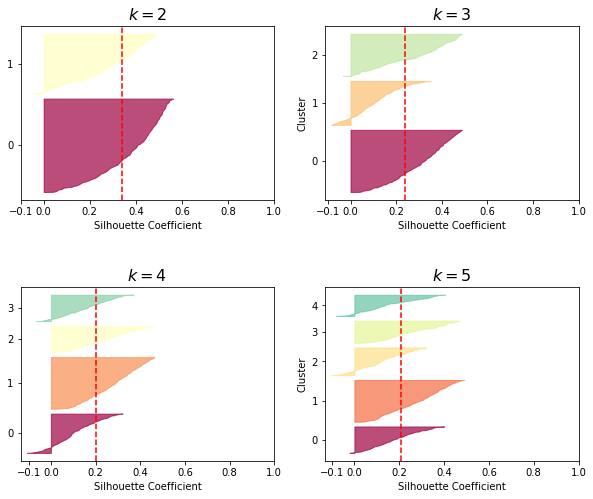

In [ ]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

#the graph shows euclidean_distance has better performance than cosine_distance in this dataset 
#So we choose euclidean_distance to show the silhouette coefficients graph

plt.figure(figsize=(10, 8))

for k in (2,3,4, 5):
    plt.subplot(2, 2, k - 1)
    plt.subplots_adjust(hspace=0.5)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(tr_pca, y_pred)

    padding = len(tr_pca) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = plt.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (2,3,4, 5):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)
plt.show()

In [ ]:
# For good custering : 
# - 1/ the average silhouette should be close to 1. 
# - 2/ all clusters silhouette should be close to the average silhouse score 
# - There for the k=2 Kmeans cluster has a better score in silhouette and all clusters 

### Second evaluation 

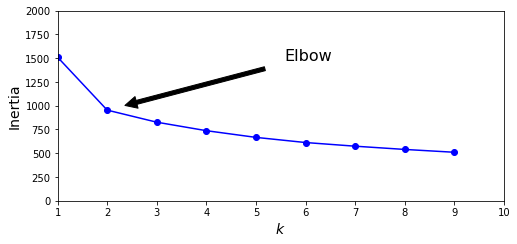

In [ ]:

# select the parameter k for number of clusters

kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(tr_pca)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]



from sklearn.metrics import silhouette_score
silhouette_scores = [silhouette_score(tr_pca, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(2, inertias[1]),
             xytext=(0.55, 0.75),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 10, 0, 2000])
plt.show()

## 2.2 ICMLA Dataset

### Train K-means clustering

In [ ]:
# using euclidean similarity measurement method
k=len(ICMLA_Y_unique)
kmeans = KMeans(n_clusters=k)
kmeans.fit(tfidf_matrix)
y_ICMLA_pred = kmeans.predict(tfidf_matrix)
print("As:", y_ICMLA_pred)

As: [13 11 13  4 16  9 12 13 21 15 12  5 23 23  9 14  8  8  6  8 12  3 12 23
  4 12 10 23 23 12 13  8  6  8 14 19  3  3 23 21 17  9 18  8 23 23 18 16
  3 16 11 17 22 23  3 14  1 18  8  7 15  3 20  7  0  3  7 13  0 23  4  3
  3 13  3  0  0 10 13  0  2 16  2  4 19 12  9 23 14  1  1 23  1 19 16  2
  6  7  6 23  9 13 23 22  5]


In [ ]:
# using cosine_distance similarity measurement method
from nltk.cluster import KMeansClusterer, euclidean_distance,cosine_distance

clusterer = KMeansClusterer(k, cosine_distance)
clusters = clusterer.cluster(tfidf_matrix,True)
# print("Clustered:", tr_pca)
print("As:", clusters)
# print("Means:", clusterer.means())

As: [22, 22, 12, 22, 13, 18, 7, 11, 9, 13, 4, 3, 20, 3, 18, 11, 1, 1, 13, 1, 3, 9, 3, 3, 3, 3, 4, 3, 3, 3, 12, 8, 16, 8, 21, 2, 0, 0, 20, 9, 19, 18, 19, 1, 15, 17, 20, 23, 0, 7, 22, 18, 18, 3, 21, 0, 14, 18, 8, 15, 14, 2, 12, 4, 2, 6, 10, 20, 21, 3, 0, 6, 1, 20, 5, 22, 0, 1, 2, 15, 22, 13, 7, 13, 2, 12, 19, 3, 0, 11, 11, 15, 20, 2, 16, 8, 12, 10, 16, 3, 18, 16, 22, 19, 1]


### First evaluation

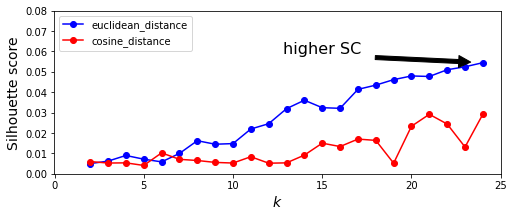

In [ ]:
from sklearn.metrics import silhouette_score

kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(tfidf_matrix)
                for k in range(1, 25)]

kmeans_per_k_cos = [KMeansClusterer(k, cosine_distance).cluster(tfidf_matrix,True)
                for k in range(1, 25)]

silhouette_scores = [silhouette_score(tfidf_matrix, model.labels_)
                     for model in kmeans_per_k[1:]]
silhouette_scores_cos = [silhouette_score(tfidf_matrix, model)
                     for model in kmeans_per_k_cos[1:]]                     

plt.figure(figsize=(8, 3))
plt.plot(range(2, 25), silhouette_scores, "bo-")
plt.plot(range(2, 25), silhouette_scores_cos, "ro-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([-0.01, 25, 0, 0.08])

plt.annotate('higher SC',
             xy=(24, silhouette_scores[-1]),
             xytext=(0.55, 0.75),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )

plt.legend(['euclidean_distance','cosine_distance'],loc='upper left')
plt.show()

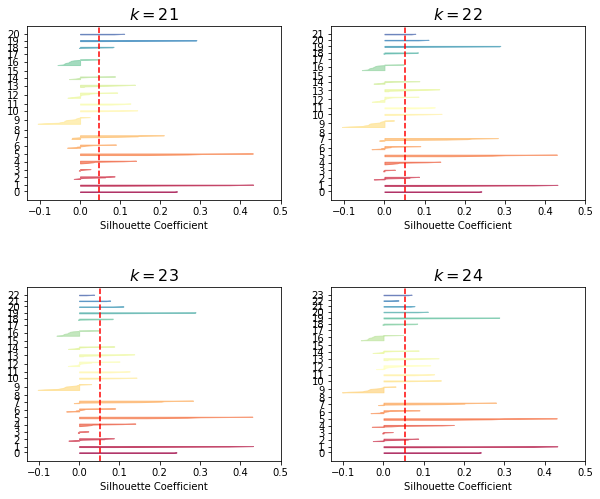

In [ ]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

#the graph shows euclidean_distance has better performance than cosine_distance in this dataset 
#So we choose euclidean_distance to show the silhouette coefficients graph

plt.figure(figsize=(10, 8))

for k in (21,22,23,24):
    plt.subplot(2, 2, k - 20)
    plt.subplots_adjust(hspace=0.5)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(tfidf_matrix, y_pred)

    padding = tfidf_matrix.shape[0] // 10
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = plt.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (21,22,23,24):
        plt.gca().set_xticks([-0.1, 0, 0.1, 0.2,0.3,0.4,0.5])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

In [ ]:
# Through the silhouette coefficient graph, we see that the clustering effect is very poor

### Second evaluation 

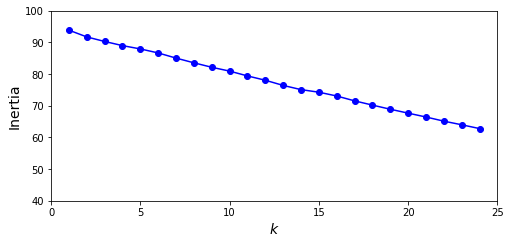

In [ ]:
# select the parameter k for number of clusters

inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 25), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
# plt.annotate('Elbow',
#              xy=(25, inertias[23]),
#              xytext=(0.55, 0.75),
#              textcoords='figure fraction',
#              fontsize=16,
#              arrowprops=dict(facecolor='black', shrink=0.1)
#             )
plt.axis([0, 25, 40, 100])
plt.show()

In [ ]:
#  we cannot simply take the value of  k  that minimizes the inertia, since it keeps getting lower as we increase  k . 
#  Indeed, the more clusters there are, the closer each instance will be to its closest centroid, and therefore the lower the inertia will be.
#  In this picture, we find the obvious elbow. So the clustering quality is not good  


# 3. Hierarchical Clustering

## 3.1 Travel Review Dataset

### Train Hierarchical clustering 

/usr/local/lib/python3.6/dist-packages/scipy/cluster/hierarchy.py:442: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='average', metric='euclidean')


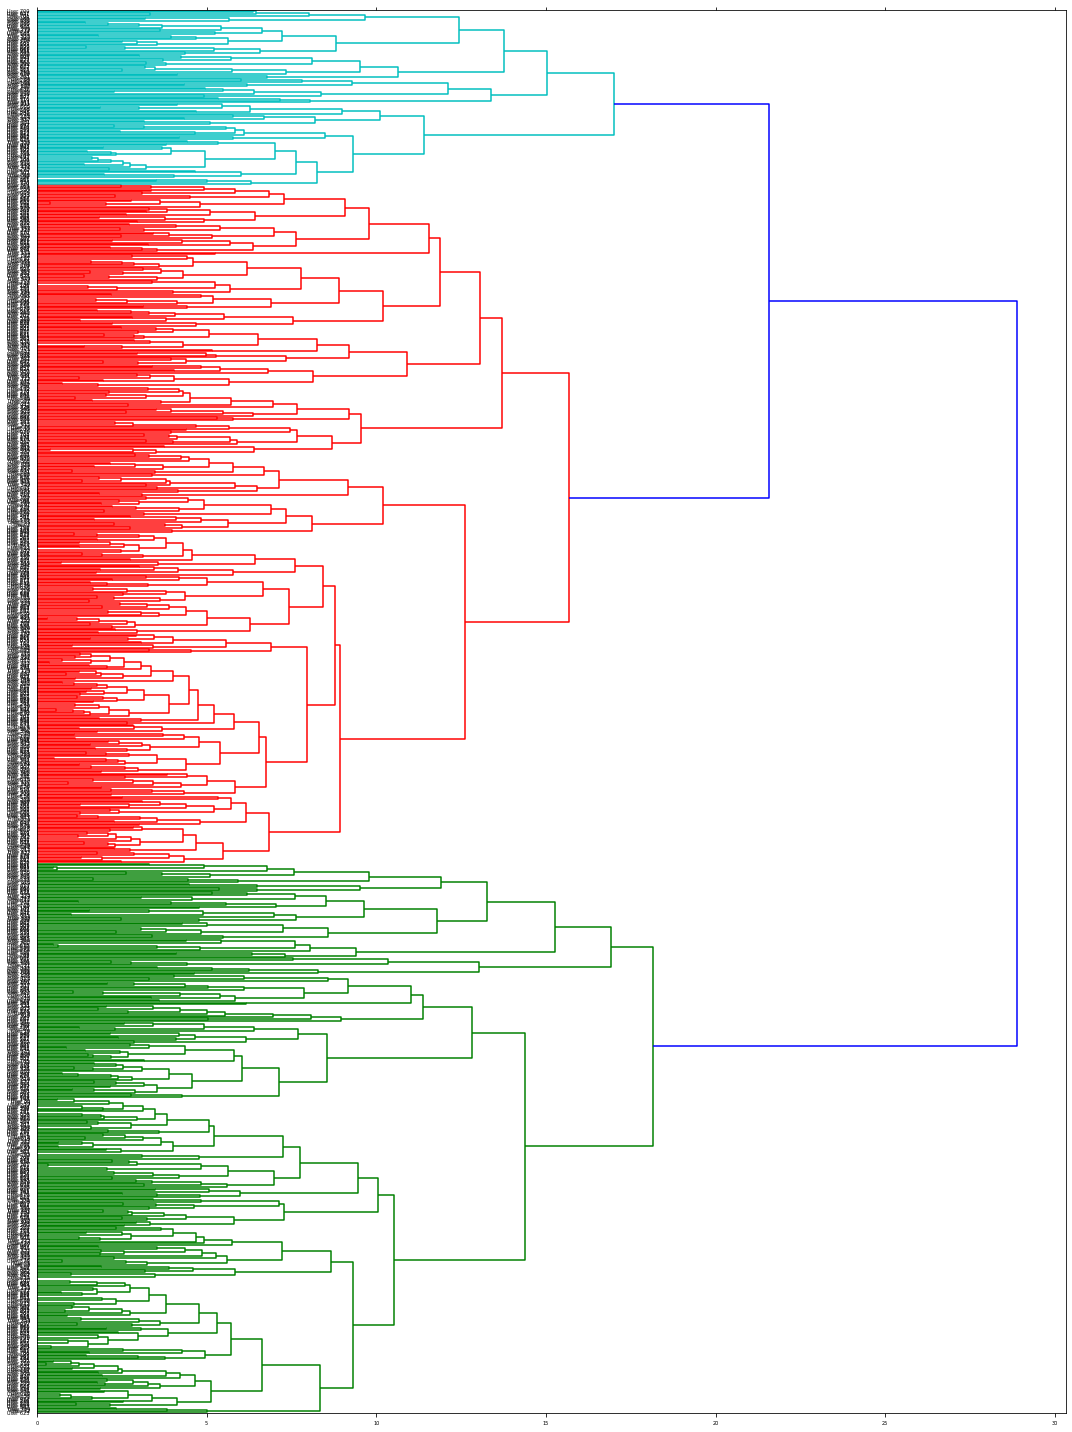

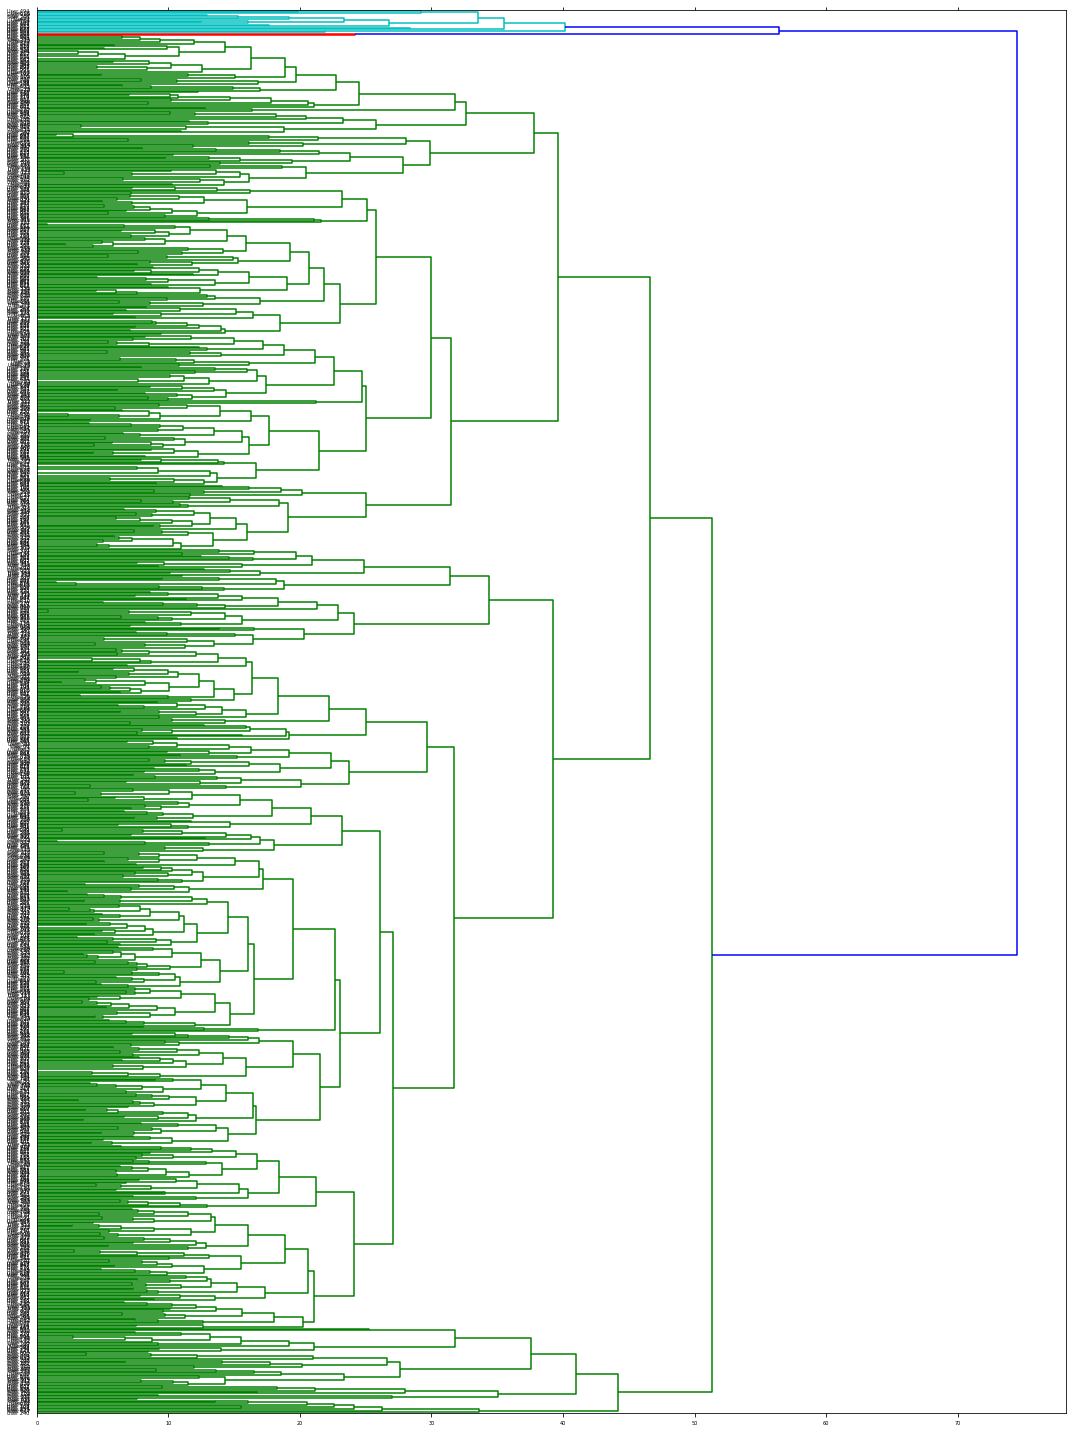

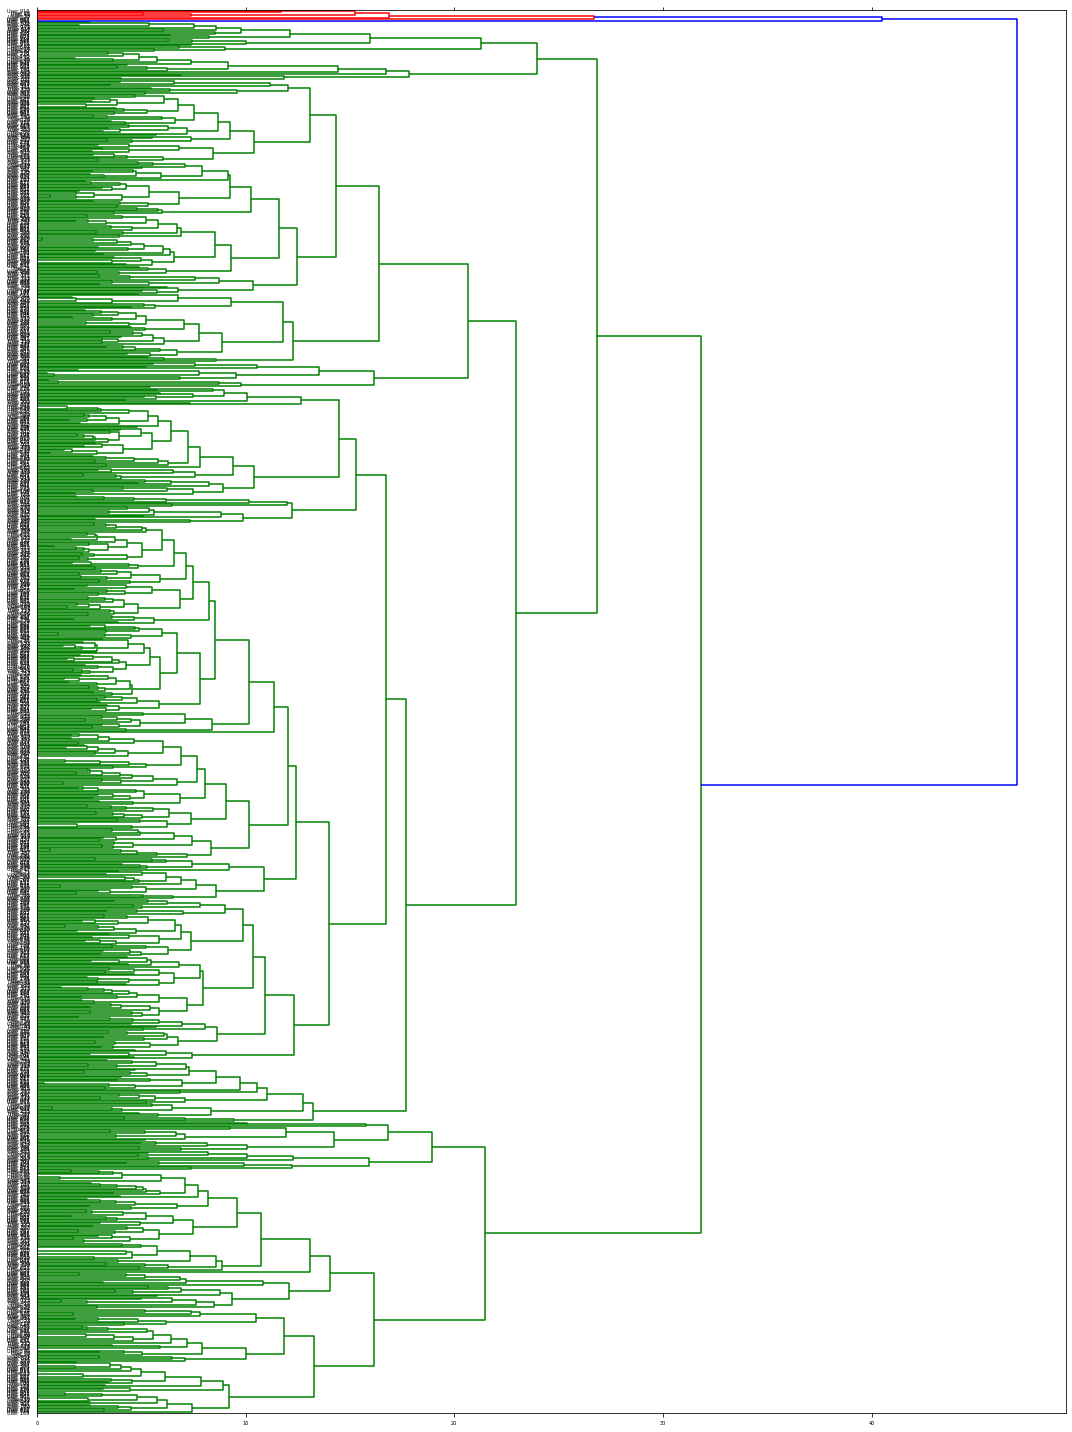

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity,manhattan_distances,euclidean_distances
import seaborn as sns
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import complete, dendrogram,single,average


dist_cos = 1-cosine_similarity(tr_pca)
dist_manhattan=manhattan_distances(tr_pca)
dist_euclidean=euclidean_distances(tr_pca)


def plot_dendrogram(dist):
    #use average distance
    linkage_matrix = average(dist)
    fig, ax = plt.subplots(figsize=(15, 20)) # set size
    ax = dendrogram(linkage_matrix, orientation="right", labels=np.array(tr_label));

    plt.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off',
        labelsize=5
        )
    plt.tick_params(\
        axis= 'y',          # changes apply to the y-axis
        labelsize=5
        )

    plt.tight_layout() #show plot with tight layout

    #save figure as ward_clusters
    #plt.savefig('ward_clusters.png', dpi=200) 

plot_dendrogram(dist_cos)
plot_dendrogram(dist_manhattan)
plot_dendrogram(dist_euclidean)

### First evaluation 

In [ ]:
# choose the best best distance metrics (from single-link, complete-link, and average link )
# and best similarity measure(cos,manhattan,euclidean)
dist_cos = 1-cosine_similarity(tr_pca)
dist_manhattan=manhattan_distances(tr_pca)
dist_euclidean=euclidean_distances(tr_pca)

# grid search of different distance metrics and similarity measures
linkage_complete_cos = complete(dist_cos)
linkage_complete_manhattan = complete(dist_manhattan)
linkage_complete_euclidean = complete(dist_euclidean)

linkage_single_cos = single(dist_cos)
linkage_single_manhattan = single(dist_manhattan)
linkage_single_euclidean = single(dist_euclidean)

linkage_average_cos = average(dist_cos)
linkage_average_manhattan = average(dist_manhattan)
linkage_average_euclidean = average(dist_euclidean)

def silhouette_Sco(linkage_matrix):
    hierachical_per_k = [fcluster(linkage_matrix,k,criterion='maxclust')
                for k in range(1, 10)]
    silhouette_scores = [silhouette_score(tr_pca, model)
                     for model in hierachical_per_k[1:]]
    return silhouette_scores


silhousette_complete_cos = silhouette_Sco(linkage_complete_cos)
silhousette_complete_manhattan = silhouette_Sco(linkage_complete_manhattan)
silhousette_complete_euclidean = silhouette_Sco(linkage_complete_euclidean)

silhousette_single_cos = silhouette_Sco(linkage_single_cos)
silhousette_single_manhattan = silhouette_Sco(linkage_single_manhattan)
silhousette_single_euclidean = silhouette_Sco(linkage_single_euclidean)

silhousette_average_cos = silhouette_Sco(linkage_average_cos)
silhousette_average_manhattan = silhouette_Sco(linkage_average_manhattan)
silhousette_average_euclidean = silhouette_Sco(linkage_average_euclidean)

/usr/local/lib/python3.6/dist-packages/scipy/cluster/hierarchy.py:360: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='complete', metric='euclidean')
/usr/local/lib/python3.6/dist-packages/scipy/cluster/hierarchy.py:278: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='single', metric='euclidean')
/usr/local/lib/python3.6/dist-packages/scipy/cluster/hierarchy.py:442: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='average', metric='euclidean')


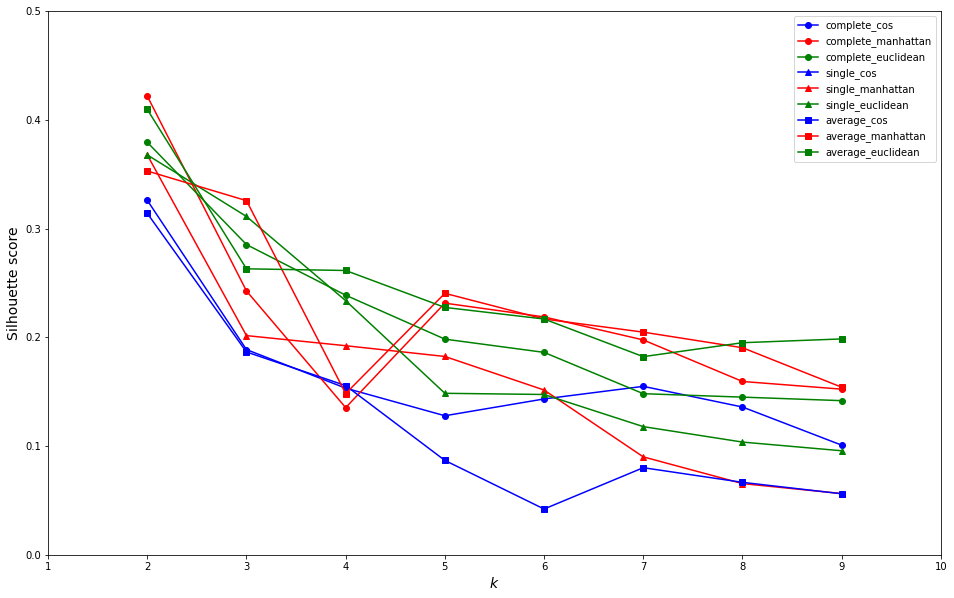

In [ ]:
# plot the performance of different measures
plt.figure(figsize=(16, 10))
plt.plot(range(2,10), silhousette_complete_cos, "bo-")
plt.plot(range(2,10), silhousette_complete_manhattan, "ro-")
plt.plot(range(2,10), silhousette_complete_euclidean, "go-")
plt.plot(range(2,10), silhousette_single_cos, "b^-")
plt.plot(range(2,10), silhousette_single_manhattan, "r^-")
plt.plot(range(2,10), silhousette_single_euclidean, "g^-")
plt.plot(range(2,10), silhousette_average_cos, "bs-")
plt.plot(range(2,10), silhousette_average_manhattan, "rs-")
plt.plot(range(2,10), silhousette_average_euclidean, "gs-")

plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1, 10, 0, 0.5])

# plt.annotate('higher SC',
#              xy=(24, silhouette_scores[-1]),
#              xytext=(0.55, 0.75),
#              textcoords='figure fraction',
#              fontsize=16,
#              arrowprops=dict(facecolor='black', shrink=0.1)
#             )
plt.legend(['complete_cos','complete_manhattan','complete_euclidean','single_cos','single_manhattan','single_euclidean','average_cos','average_manhattan','average_euclidean'],loc='upper right')
plt.show()

In [ ]:
# According to the graph, we can find that average link and manhattan_distances with k=2 has best performance in the silhouette coefficient

### Second evaluation 

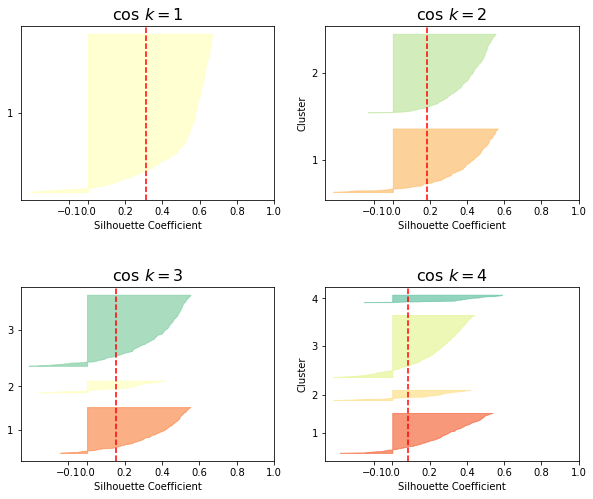

****************************************************************************************************************************************************************


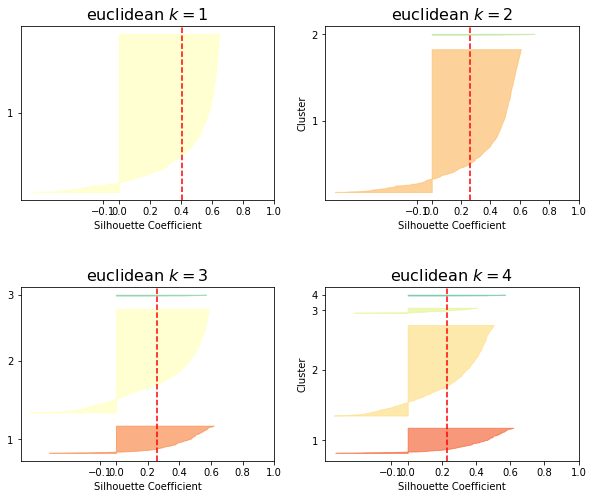

****************************************************************************************************************************************************************


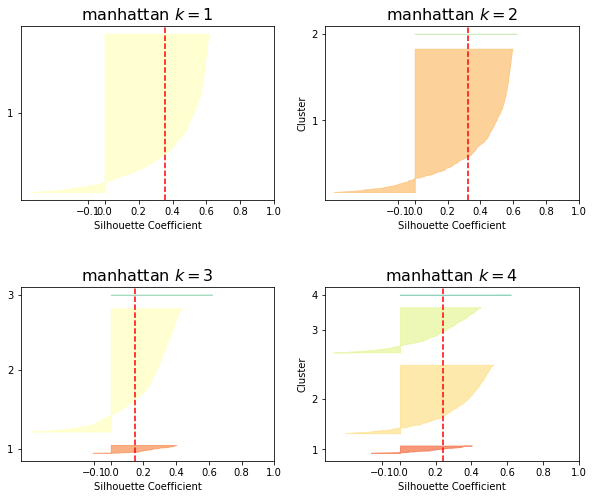

****************************************************************************************************************************************************************


In [ ]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

#we wil shows average_link and different distance methods's performance in the silhouette coefficient graph


def plot_SCP(hierachical_per_k,silhouette_scores,distance,title):
    plt.figure(figsize=(10, 8))
    

    for k in (2,3,4,5):
        plt.subplot(2, 2, k -1)
        plt.subplots_adjust(hspace=0.5)
        
        y_pred = hierachical_per_k[k - 1]
        silhouette_coefficients = silhouette_samples(distance, y_pred)

        padding = distance.shape[0] // 10
        pos = padding
        ticks = []
        for i in range(k):
            coeffs = silhouette_coefficients[y_pred == i]
            coeffs.sort()

            color = plt.cm.Spectral(i / k)
            plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                            facecolor=color, edgecolor=color, alpha=0.7)
            ticks.append(pos + len(coeffs) // 2)
            pos += len(coeffs) + padding

        plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
        plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
        if k in (3, 5):
            plt.ylabel('Cluster')

        if k in (2,3,4,5):
            # plt.title(title)
            plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
            plt.xlabel("Silhouette Coefficient")
        else:
            plt.tick_params(labelbottom=False)

        plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
        plt.title(title+" $k={}$".format(k-1), fontsize=16)
    #plt.title(title)
    plt.show()
    print('*'*160)

hierachical_per_k_cos = [fcluster(linkage_average_cos,k,criterion='maxclust')
                for k in range(1, 10)]
hierachical_per_k_eud = [fcluster(linkage_average_euclidean,k,criterion='maxclust')
                for k in range(1, 10)]
hierachical_per_k_man = [fcluster(linkage_average_manhattan,k,criterion='maxclust')
                for k in range(1, 10)]
plot_SCP(hierachical_per_k_cos,silhousette_average_cos,dist_cos,'cos')
plot_SCP(hierachical_per_k_eud,silhousette_average_euclidean,dist_euclidean,'euclidean')
plot_SCP(hierachical_per_k_man,silhousette_average_manhattan,dist_manhattan,'manhattan')

In [ ]:
# According to the dendrogram graph as well as silhouette coefficient graph, we can find that cosine distance method and average_link with k=2 has a better clutering performance

## 3.2 ICMLA Dataset

### Train Hierarchical clustering 

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity,manhattan_distances,euclidean_distances
import seaborn as sns
from scipy.cluster.hierarchy import fcluster

dist_cos = 1-cosine_similarity(tfidf_matrix)
dist_manhattan=manhattan_distances(tfidf_matrix)
dist_euclidean=euclidean_distances(tfidf_matrix)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
/usr/local/lib/python3.6/dist-packages/scipy/cluster/hierarchy.py:442: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='average', metric='euclidean')


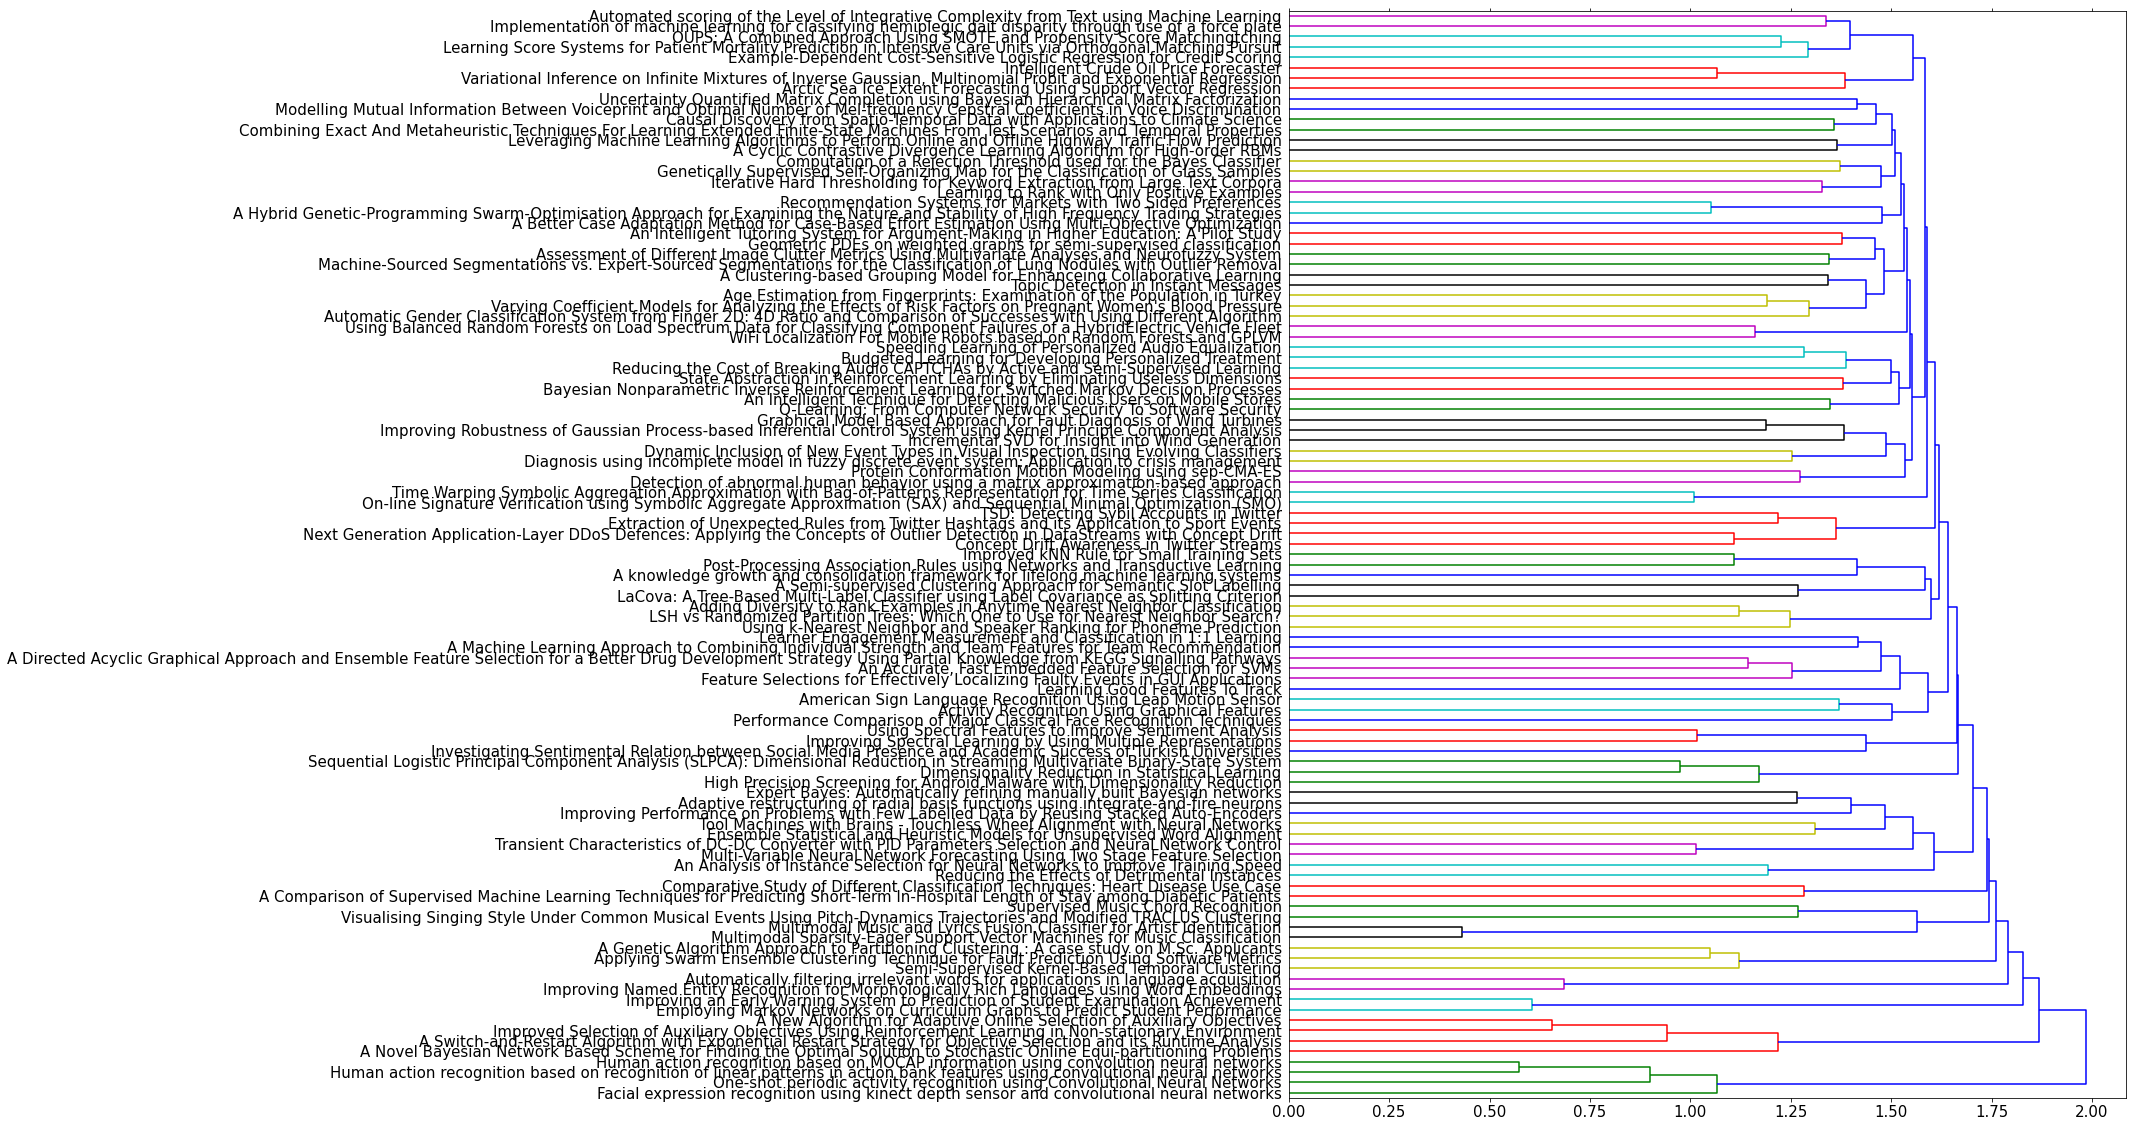

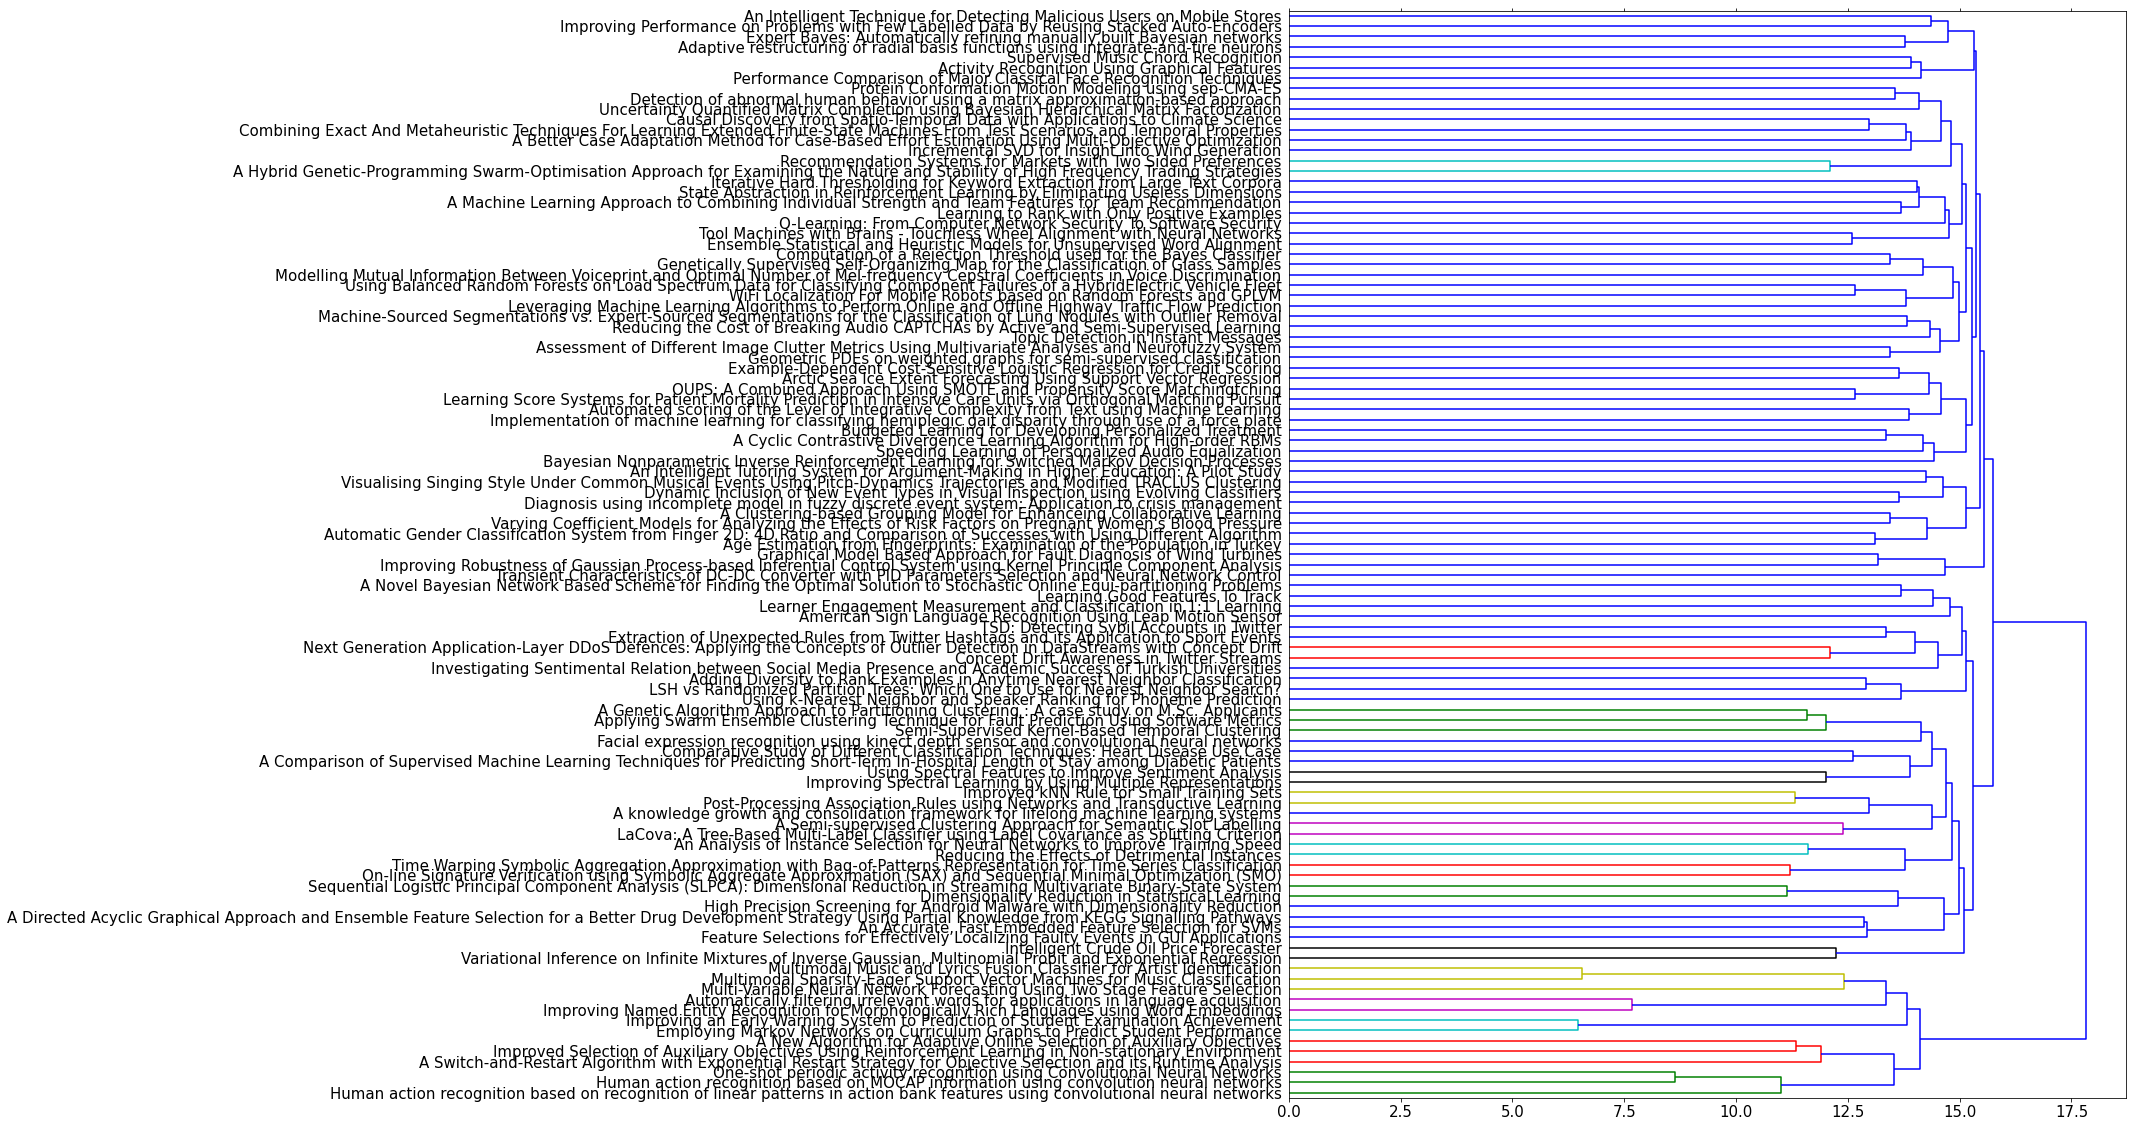

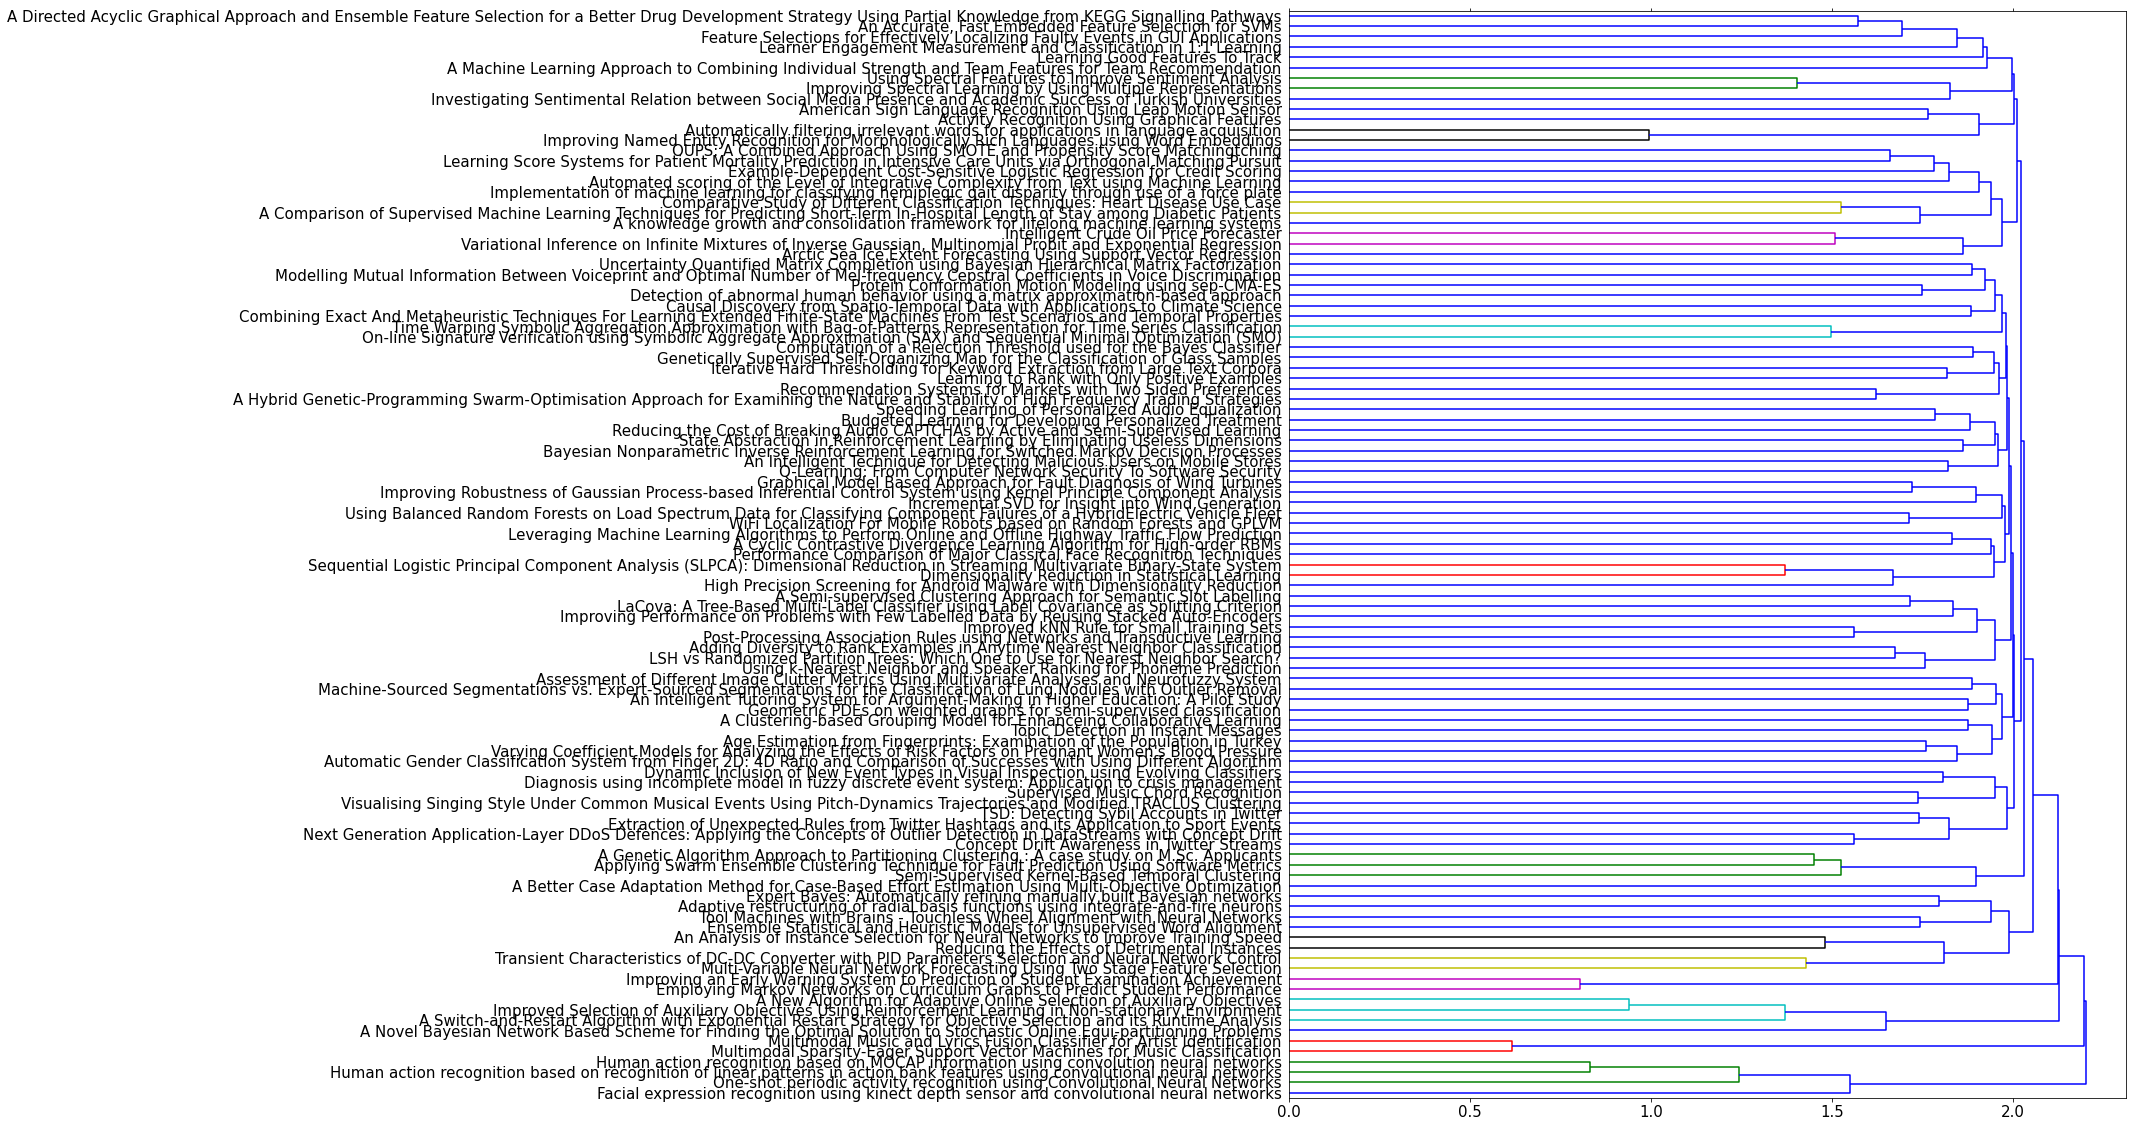

In [ ]:
###We'll use Scipy package for hierarchinal clustering
from scipy.cluster.hierarchy import complete, dendrogram,single,average
def plot_dendrogram(dist):
    #use complete distance
    linkage_matrix = average(dist)
    fig, ax = plt.subplots(figsize=(15, 20)) # set size
    ax = dendrogram(linkage_matrix, orientation="right", labels=np.array(ICMLA_df['paper_title']));

    plt.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off',
        labelsize=15
        )
    plt.tick_params(\
        axis= 'y',          # changes apply to the y-axis
        labelsize=15
        )

    plt.tight_layout() #show plot with tight layout

    #save figure as ward_clusters
    plt.savefig('ward_clusters.png', dpi=200) 

plot_dendrogram(dist_cos)
plot_dendrogram(dist_manhattan)
plot_dendrogram(dist_euclidean)

### First evaluation

In [ ]:
# choose the best best distance metrics (from single-link, complete-link, and average link )
# and best similarity measure(cos,manhattan,euclidean)
dist_cos = 1-cosine_similarity(tfidf_matrix)
dist_manhattan=manhattan_distances(tfidf_matrix)
dist_euclidean=euclidean_distances(tfidf_matrix)

# grid search of different distance metrics and similarity measures
linkage_complete_cos = complete(dist_cos)
linkage_complete_manhattan = complete(dist_manhattan)
linkage_complete_euclidean = complete(dist_euclidean)

linkage_single_cos = single(dist_cos)
linkage_single_manhattan = single(dist_manhattan)
linkage_single_euclidean = single(dist_euclidean)

linkage_average_cos = average(dist_cos)
linkage_average_manhattan = average(dist_manhattan)
linkage_average_euclidean = average(dist_euclidean)

def silhouette_Sco(linkage_matrix):
    hierachical_per_k = [fcluster(linkage_matrix,k,criterion='maxclust')
                for k in range(1, 25)]
    silhouette_scores = [silhouette_score(tfidf_matrix, model)
                     for model in hierachical_per_k[1:]]
    return silhouette_scores


silhousette_complete_cos = silhouette_Sco(linkage_complete_cos)
silhousette_complete_manhattan = silhouette_Sco(linkage_complete_manhattan)
silhousette_complete_euclidean = silhouette_Sco(linkage_complete_euclidean)

silhousette_single_cos = silhouette_Sco(linkage_single_cos)
silhousette_single_manhattan = silhouette_Sco(linkage_single_manhattan)
silhousette_single_euclidean = silhouette_Sco(linkage_single_euclidean)

silhousette_average_cos = silhouette_Sco(linkage_average_cos)
silhousette_average_manhattan = silhouette_Sco(linkage_average_manhattan)
silhousette_average_euclidean = silhouette_Sco(linkage_average_euclidean)

/usr/local/lib/python3.6/dist-packages/scipy/cluster/hierarchy.py:360: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='complete', metric='euclidean')
/usr/local/lib/python3.6/dist-packages/scipy/cluster/hierarchy.py:278: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='single', metric='euclidean')
/usr/local/lib/python3.6/dist-packages/scipy/cluster/hierarchy.py:442: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='average', metric='euclidean')


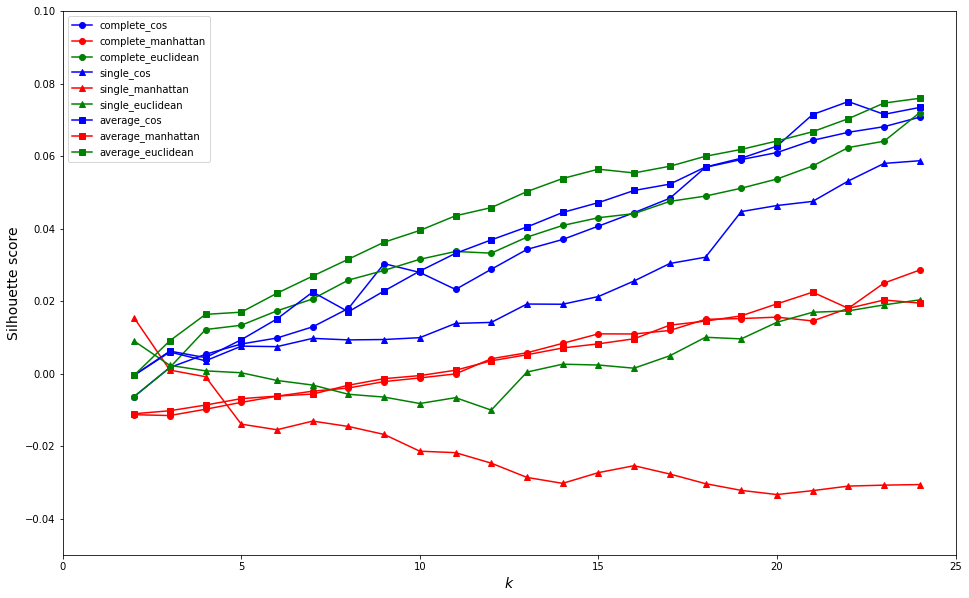

In [ ]:
# plot the performance of different measures
plt.figure(figsize=(16, 10))
plt.plot(range(2, 25), silhousette_complete_cos, "bo-")
plt.plot(range(2, 25), silhousette_complete_manhattan, "ro-")
plt.plot(range(2, 25), silhousette_complete_euclidean, "go-")
plt.plot(range(2, 25), silhousette_single_cos, "b^-")
plt.plot(range(2, 25), silhousette_single_manhattan, "r^-")
plt.plot(range(2, 25), silhousette_single_euclidean, "g^-")
plt.plot(range(2, 25), silhousette_average_cos, "bs-")
plt.plot(range(2, 25), silhousette_average_manhattan, "rs-")
plt.plot(range(2, 25), silhousette_average_euclidean, "gs-")

plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([0, 25, -0.05, 0.1])

# plt.annotate('higher SC',
#              xy=(24, silhouette_scores[-1]),
#              xytext=(0.55, 0.75),
#              textcoords='figure fraction',
#              fontsize=16,
#              arrowprops=dict(facecolor='black', shrink=0.1)
#             )
plt.legend(['complete_cos','complete_manhattan','complete_euclidean','single_cos','single_manhattan','single_euclidean','average_cos','average_manhattan','average_euclidean'],loc='upper left')
plt.show()

In [ ]:
## According to the graph, we can find that 
# {complete link and cosine_distances} 
# {complete link and euclidean_distance} 
# {average link and cosine_distances} 
# {average link and euclidean_distance}
# with k=24 has better performance in the silhouette coefficient

### Second evalaution 

****************************************************************************************************************************************************************


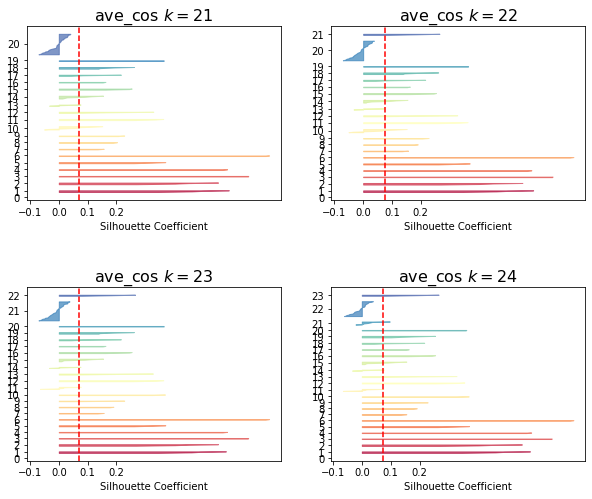

****************************************************************************************************************************************************************


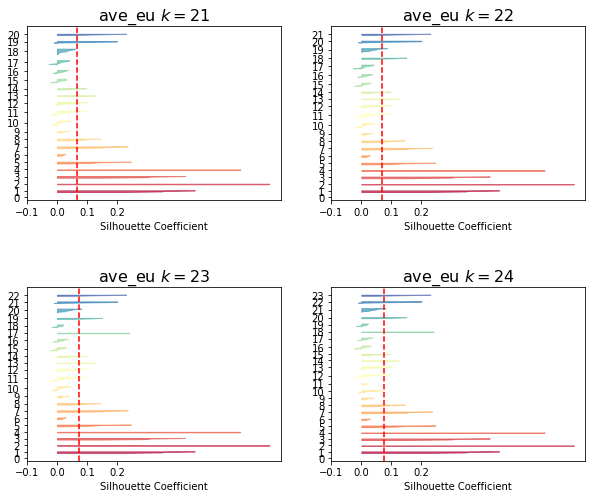

****************************************************************************************************************************************************************


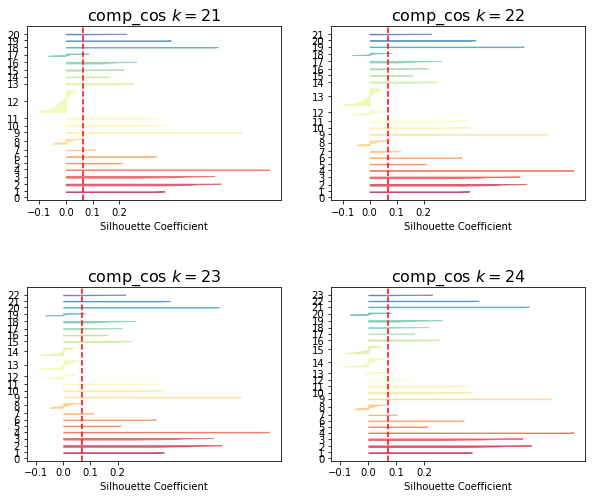

****************************************************************************************************************************************************************


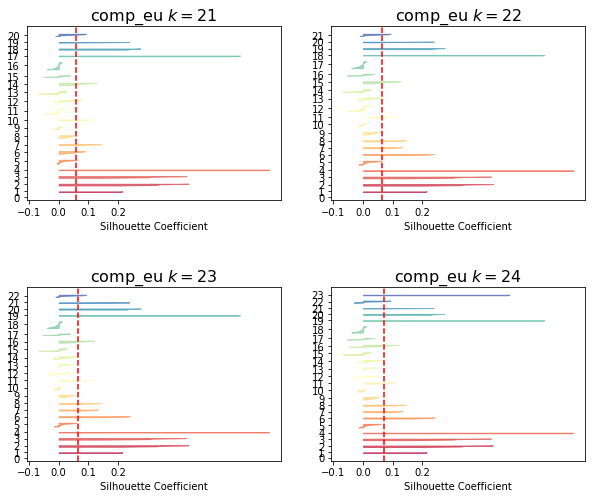

In [ ]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

#the graph shows complete_link and cosine_distances has best performance in the silhouette coefficient



def plot_hierachical_SC(hierachical_per_k,silhouette_scores,distance,title):
    plt.figure(figsize=(10, 8))
    for k in (21,22,23,24):
        plt.subplot(2, 2, k - 20)
        plt.subplots_adjust(hspace=0.5)
        
        y_pred = hierachical_per_k[k - 1]
        silhouette_coefficients = silhouette_samples(distance, y_pred)

        padding = distance.shape[0] // 10
        pos = padding
        ticks = []
        for i in range(k):
            coeffs = silhouette_coefficients[y_pred == i]
            coeffs.sort()

            color = plt.cm.Spectral(i / k)
            plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                            facecolor=color, edgecolor=color, alpha=0.7)
            ticks.append(pos + len(coeffs) // 2)
            pos += len(coeffs) + padding

        plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
        plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
        if k in (3, 5):
            plt.ylabel("Cluster")
        
        if k in (21,22,23,24):
            plt.gca().set_xticks([-0.1, 0, 0.1, 0.2])
            plt.xlabel("Silhouette Coefficient")
        else:
            plt.tick_params(labelbottom=False)

        plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
        plt.title(title+" $k={}$".format(k), fontsize=16)
    print('*'*160)
    plt.show()


hierachical_per_k_ave_cos = [fcluster(linkage_average_cos,k,criterion='maxclust')
                for k in range(1, 25)]
hierachical_per_k_ave_eu = [fcluster(linkage_average_euclidean,k,criterion='maxclust')
                for k in range(1, 25)]
hierachical_per_k_comp_cos = [fcluster(linkage_complete_cos,k,criterion='maxclust')
                for k in range(1, 25)]
hierachical_per_k_comp_eu = [fcluster(linkage_complete_euclidean,k,criterion='maxclust')
                for k in range(1, 25)]

plot_hierachical_SC(hierachical_per_k_ave_cos,silhousette_average_cos,dist_cos,'ave_cos')
plot_hierachical_SC(hierachical_per_k_ave_eu,silhousette_average_euclidean,dist_euclidean,'ave_eu')
plot_hierachical_SC(hierachical_per_k_comp_cos,silhousette_complete_cos,dist_cos,'comp_cos')
plot_hierachical_SC(hierachical_per_k_comp_eu,silhousette_complete_euclidean,dist_euclidean,'comp_eu')

In [ ]:
# Through the silhouette coefficient graph, 
# we can see that avergae_link and cosine_distance has better performance than the others in the silhouette coefficient graph
# Despite this, we see that the clustering effect is very poor as the value is close to 0 though all clusters silhouette are close to the average silhouse score 



---


# 4. DBSCAN Clustering

## 4.1 Travel Review Dataset

### Train DBSCAN clustering 

In [ ]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

In [ ]:
from sklearn.cluster import DBSCAN

# According to evaluation, we choose eps=0.58 min-points=7 with euclidean distance method for better performance

dbscan = DBSCAN(eps=0.58, min_samples=7)
dbscan.fit(tr_pca)
print(np.unique(dbscan.labels_))


[-1  0  1]


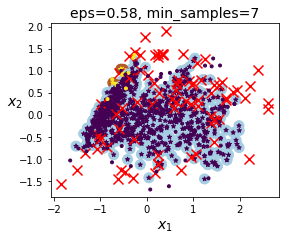

In [ ]:
# the plot just use previous two features of the PCA data to show the classfication
plt.figure(figsize=(9, 3.2))
plt.subplot(121)
plot_dbscan(dbscan, tr_pca, size=100)
plt.show()

### First evaluation

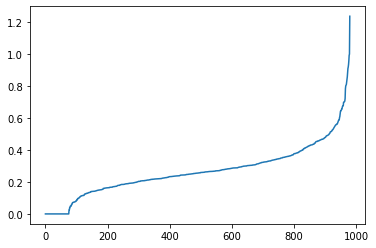

In [ ]:
#reference of DBSCAN Python Example: The Optimal Value For Epsilon (EPS)
#https://towardsdatascience.com/machine-learning-clustering-dbscan-determine-the-optimal-value-for-epsilon-eps-python-example-3100091cfbc

# using the euclidean distance method
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(tr_pca)
distances, indices = nbrs.kneighbors(tr_pca)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [ ]:
from sklearn.metrics import silhouette_score
# using the euclidean distance method

eps_list=np.arange(0.4,0.62,0.02)

min_sample_list=[3,4,5,6,7,8,9,10]

def silhouette_dbscan_SC(eps_):
    dbscan_per_iter = [DBSCAN(eps=eps_, min_samples=min_sample_).fit(tr_pca)
                for min_sample_ in min_sample_list]
    silhouette_scores = [silhouette_score(tr_pca, model.labels_)
                     for model in dbscan_per_iter[:]]
    return silhouette_scores

silhouette_scores_array=[]
for eps in eps_list:
    silhouette_scores_item=silhouette_dbscan_SC(eps)
    silhouette_scores_array.append(silhouette_scores_item)


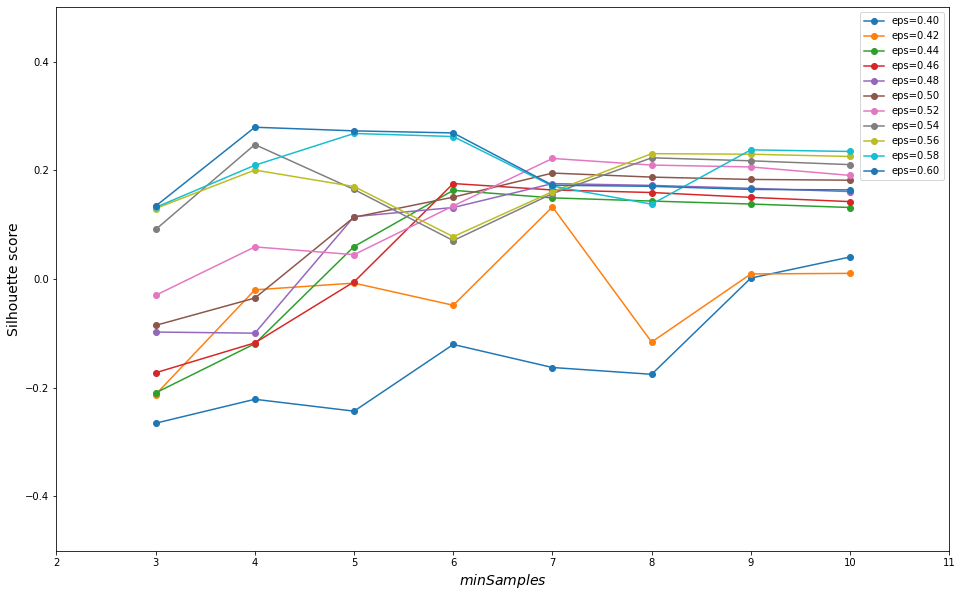

In [ ]:
# plot the performance of different measures
# using the euclidean distance method
plt.figure(figsize=(16, 10))
for i,silhouette_scores_item in enumerate(silhouette_scores_array):
    plt.plot(range(3,11), silhouette_scores_item,'o-')


plt.xlabel("$minSamples$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([2, 11, -0.5, 0.5])

# plt.annotate('higher SC',
#              xy=(24, silhouette_scores[-1]),
#              xytext=(0.55, 0.75),
#              textcoords='figure fraction',
#              fontsize=16,
#              arrowprops=dict(facecolor='black', shrink=0.1)
#             )
plt.legend(['eps={:.2f}'.format(i) for i in eps_list ])
plt.show()

In [ ]:
# choose the optimal eps with higher Silhouette score : 0.6,0.58,0.54,0.52

In [ ]:
# using the euclidean distance method
def num_k_dbscan(eps_,min_sample_):
    dbscan = DBSCAN(eps=eps_, min_samples=min_sample_)
    dbscan.fit(tr_pca)
    print('eps={},min_sample={},cluster_num={}'.format(eps_,min_sample_,np.unique(dbscan.labels_)))

for eps in [0.6,0.58,0.54,0.52]:
    for min_sampel in [4,5,6,7]:
        num_k_dbscan(eps,min_sampel)


eps=0.6,min_sample=4,cluster_num=[-1  0]
eps=0.6,min_sample=5,cluster_num=[-1  0]
eps=0.6,min_sample=6,cluster_num=[-1  0]
eps=0.6,min_sample=7,cluster_num=[-1  0  1]
eps=0.58,min_sample=4,cluster_num=[-1  0  1]
eps=0.58,min_sample=5,cluster_num=[-1  0]
eps=0.58,min_sample=6,cluster_num=[-1  0]
eps=0.58,min_sample=7,cluster_num=[-1  0  1]
eps=0.54,min_sample=4,cluster_num=[-1  0]
eps=0.54,min_sample=5,cluster_num=[-1  0  1]
eps=0.54,min_sample=6,cluster_num=[-1  0  1  2]
eps=0.54,min_sample=7,cluster_num=[-1  0  1]
eps=0.52,min_sample=4,cluster_num=[-1  0  1  2]
eps=0.52,min_sample=5,cluster_num=[-1  0  1  2  3]
eps=0.52,min_sample=6,cluster_num=[-1  0  1  2]
eps=0.52,min_sample=7,cluster_num=[-1  0]


In [ ]:
# We can check the data pairs of the top higher scores with more than 2 clusters:
# {eps , min-points} :  {0.6,7}{0.58,4}{0.58,7}{0.54,5}{0.54,6}{0.54,7}{0.52,5}{0.52,6}

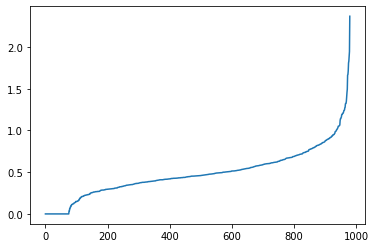

In [ ]:
#reference of DBSCAN Python Example: The Optimal Value For Epsilon (EPS)
#https://towardsdatascience.com/machine-learning-clustering-dbscan-determine-the-optimal-value-for-epsilon-eps-python-example-3100091cfbc

# using the manhattan distance method
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2,metric='manhattan')
nbrs = neigh.fit(tr_pca)
distances, indices = nbrs.kneighbors(tr_pca)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [ ]:
from sklearn.metrics import silhouette_score

# using the manhattan distance method
eps_list=np.arange(0.9,1.1,0.02)
min_sample_list=[3,4,5,6,7,8,9,10]

def silhouette_dbscan_SC(eps_):
    dbscan_per_iter = [DBSCAN(eps=eps_, min_samples=min_sample_,metric='manhattan').fit(tr_pca)
                for min_sample_ in min_sample_list]
    silhouette_scores = [silhouette_score(tr_pca, model.labels_,metric='manhattan')
                     for model in dbscan_per_iter[:]]
    return silhouette_scores

silhouette_scores_array=[]
for eps in eps_list:
    silhouette_scores_item=silhouette_dbscan_SC(eps)
    silhouette_scores_array.append(silhouette_scores_item)


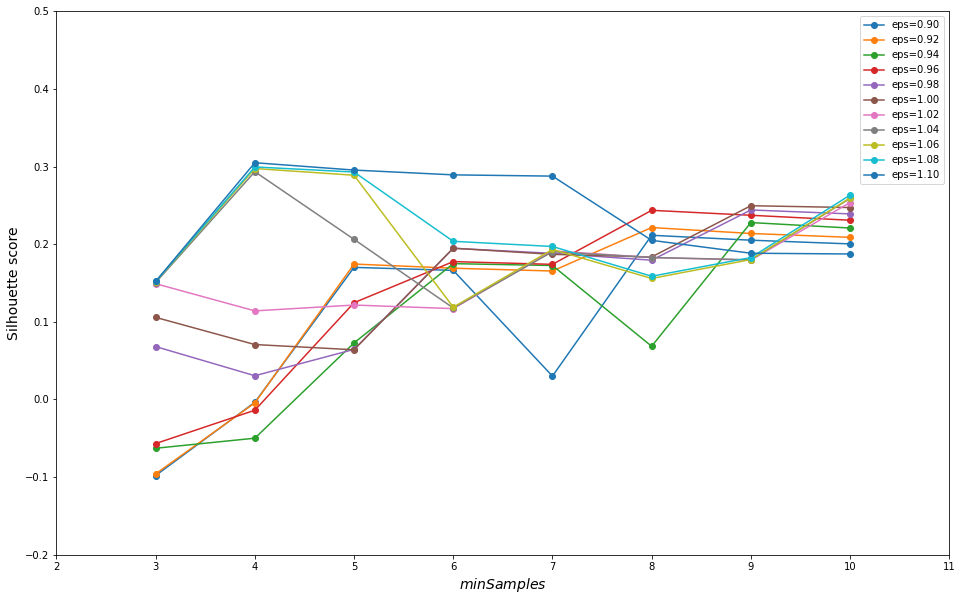

In [ ]:
# plot the performance of different measures
# using the manhattan distance method
plt.figure(figsize=(16, 10))
for i,silhouette_scores_item in enumerate(silhouette_scores_array):
    plt.plot(range(3,11), silhouette_scores_item,'o-')


plt.xlabel("$minSamples$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([2, 11, -0.2, 0.5])

# plt.annotate('higher SC',
#              xy=(24, silhouette_scores[-1]),
#              xytext=(0.55, 0.75),
#              textcoords='figure fraction',
#              fontsize=16,
#              arrowprops=dict(facecolor='black', shrink=0.1)
#             )
plt.legend(['eps={:.2f}'.format(i) for i in eps_list ])
plt.show()

In [ ]:
# choose the optimal eps with higher Silhouette score : 1.1/1.08/1.06

In [ ]:
# using the manhattan distance method
def num_k_dbscan(eps_,min_sample_):
    dbscan = DBSCAN(eps=eps_, min_samples=min_sample_,metric='manhattan')
    dbscan.fit(tr_pca)
    print('eps={},min_sample={},cluster_num={}'.format(eps_,min_sample_,np.unique(dbscan.labels_)))

for eps in [1.1,1.08,1.06]:
    for min_sampel in [3,4,5,6,7]:
        num_k_dbscan(eps,min_sampel)

eps=1.1,min_sample=3,cluster_num=[-1  0  1]
eps=1.1,min_sample=4,cluster_num=[-1  0]
eps=1.1,min_sample=5,cluster_num=[-1  0]
eps=1.1,min_sample=6,cluster_num=[-1  0]
eps=1.1,min_sample=7,cluster_num=[-1  0]
eps=1.08,min_sample=3,cluster_num=[-1  0  1]
eps=1.08,min_sample=4,cluster_num=[-1  0]
eps=1.08,min_sample=5,cluster_num=[-1  0]
eps=1.08,min_sample=6,cluster_num=[-1  0  1]
eps=1.08,min_sample=7,cluster_num=[-1  0  1]
eps=1.06,min_sample=3,cluster_num=[-1  0  1]
eps=1.06,min_sample=4,cluster_num=[-1  0]
eps=1.06,min_sample=5,cluster_num=[-1  0]
eps=1.06,min_sample=6,cluster_num=[-1  0  1  2]
eps=1.06,min_sample=7,cluster_num=[-1  0  1]


In [ ]:
# We can check the data pairs of the top higher scores with more than 2 clusters:
# {eps , min-points} :  {1.1,3}{1.08,3}{1.08,6}{1.08,7}{1.06,3}{0.54,7}{1.06,6}{1.06,7}

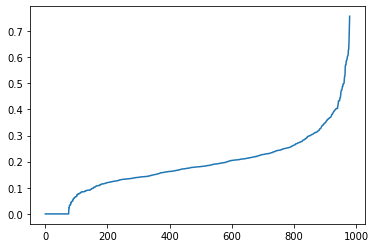

In [ ]:
#reference of DBSCAN Python Example: The Optimal Value For Epsilon (EPS)
#https://towardsdatascience.com/machine-learning-clustering-dbscan-determine-the-optimal-value-for-epsilon-eps-python-example-3100091cfbc
# using the chebyshev distance method

from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2,metric='chebyshev')
nbrs = neigh.fit(tr_pca)
distances, indices = nbrs.kneighbors(tr_pca)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [ ]:
from sklearn.metrics import silhouette_score
# using the chebyshev distance method
eps_list=np.arange(0.26,0.4,0.02)
min_sample_list=[3,4,5,6,7,8,9,10]

def silhouette_dbscan_SC(eps_):
    dbscan_per_iter = [DBSCAN(eps=eps_, min_samples=min_sample_,metric='chebyshev').fit(tr_pca)
                for min_sample_ in min_sample_list]
    silhouette_scores = [silhouette_score(tr_pca, model.labels_,metric='chebyshev')
                     for model in dbscan_per_iter[:]]
    return silhouette_scores

silhouette_scores_array=[]
for eps in eps_list:
    silhouette_scores_item=silhouette_dbscan_SC(eps)
    silhouette_scores_array.append(silhouette_scores_item)


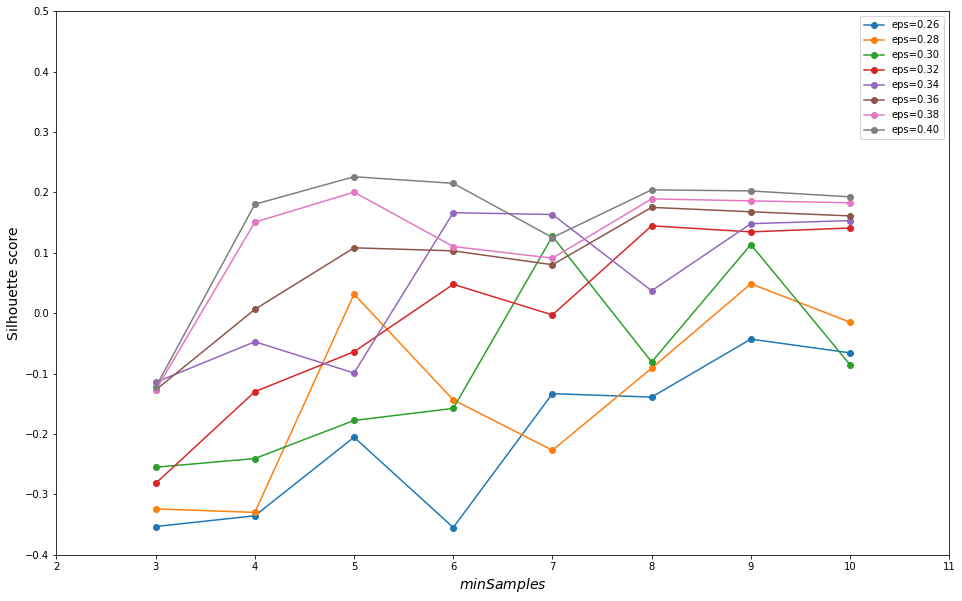

In [ ]:
# plot the performance of different measures
# using the chebyshev distance method
plt.figure(figsize=(16, 10))
for i,silhouette_scores_item in enumerate(silhouette_scores_array):
    plt.plot(range(3,11), silhouette_scores_item,'o-')


plt.xlabel("$minSamples$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([2, 11, -0.4, 0.5])

# plt.annotate('higher SC',
#              xy=(24, silhouette_scores[-1]),
#              xytext=(0.55, 0.75),
#              textcoords='figure fraction',
#              fontsize=16,
#              arrowprops=dict(facecolor='black', shrink=0.1)
#             )
plt.legend(['eps={:.2f}'.format(i) for i in eps_list ])
plt.show()

In [ ]:
# choose the optimal eps with higher Silhouette score : 0.4/0.38/0.34

In [ ]:
def num_k_dbscan(eps_,min_sample_):
    dbscan = DBSCAN(eps=eps_, min_samples=min_sample_,metric='chebyshev')
    dbscan.fit(tr_pca)
    print('eps={},min_sample={},cluster_num={}'.format(eps_,min_sample_,np.unique(dbscan.labels_)))

for eps in [0.4,0.38,0.34]:
    for min_sampel in [3,4,5,6,7]:
        num_k_dbscan(eps,min_sampel)

eps=0.4,min_sample=3,cluster_num=[-1  0  1  2]
eps=0.4,min_sample=4,cluster_num=[-1  0  1]
eps=0.4,min_sample=5,cluster_num=[-1  0]
eps=0.4,min_sample=6,cluster_num=[-1  0]
eps=0.4,min_sample=7,cluster_num=[-1  0  1]
eps=0.38,min_sample=3,cluster_num=[-1  0  1  2]
eps=0.38,min_sample=4,cluster_num=[-1  0  1]
eps=0.38,min_sample=5,cluster_num=[-1  0]
eps=0.38,min_sample=6,cluster_num=[-1  0  1]
eps=0.38,min_sample=7,cluster_num=[-1  0  1]
eps=0.34,min_sample=3,cluster_num=[-1  0  1  2  3  4]
eps=0.34,min_sample=4,cluster_num=[-1  0  1  2  3]
eps=0.34,min_sample=5,cluster_num=[-1  0  1  2  3  4]
eps=0.34,min_sample=6,cluster_num=[-1  0]
eps=0.34,min_sample=7,cluster_num=[-1  0]


In [ ]:
# We can check the data pairs of the top higher scores with more than 2 clusters:
# {eps , min-points} :  {0.4,3}{0.3,4}{0.4,7}{0.38,3}

### Second evaluation 

Euclidean distance model


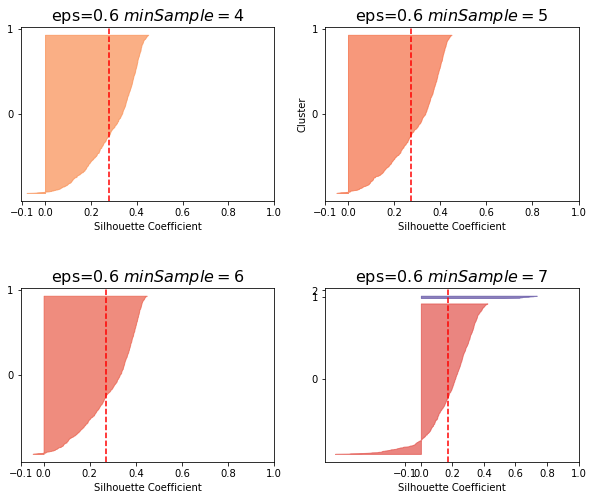

****************************************************************************************************************************************************************


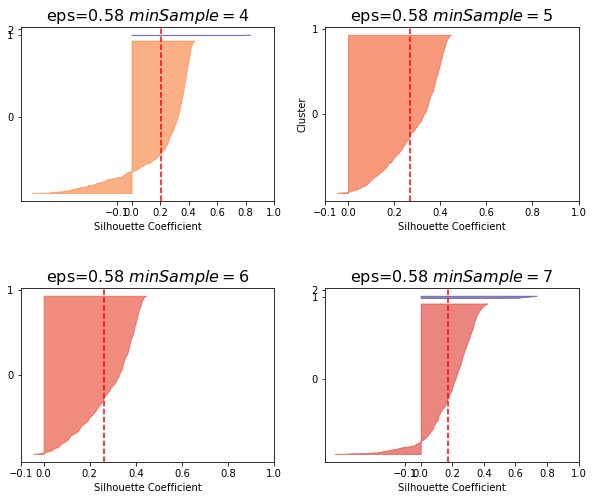

****************************************************************************************************************************************************************


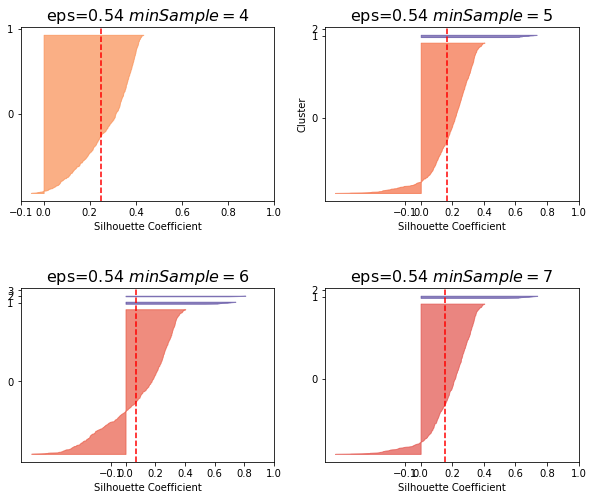

****************************************************************************************************************************************************************


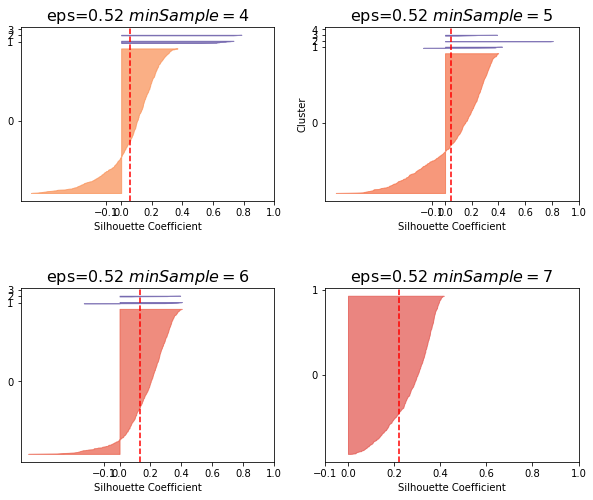

****************************************************************************************************************************************************************


In [ ]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter


# using the euclidean distance method
# We can check the data pairs of the top higher scores with more than 2 clusters:
# {eps , min-points} :  {0.6,7}{0.58,4}{0.58,7}{0.54,5}{0.54,6}{0.54,7}{0.52,5}{0.52,6}

def plot_dbscan_SCP(dbscan_per_k,title):
    plt.figure(figsize=(10, 8))
    

    for k in (4,5,6,7):
        plt.subplot(2, 2, k -3)
        plt.subplots_adjust(hspace=0.5)
        
        y_pred = dbscan_per_k[k - 3].labels_
        silhouette_coefficients = silhouette_samples(tr_pca, y_pred,metric='euclidean')

        padding = tr_pca.shape[0] // 30
    
        pos = padding
        ticks = []
        for i in range(k):
            coeffs = silhouette_coefficients[y_pred == i]
            coeffs.sort()

            color = plt.cm.Spectral(i+1 / k)
            plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                            facecolor=color, edgecolor=color, alpha=0.7)
            ticks.append(pos + len(coeffs) // 2)
            pos += len(coeffs) + padding

        plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
        plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
        if k in (3, 5):
            plt.ylabel('Cluster')

        if k in (4,5,6,7):
            # plt.title(title)
            plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
            plt.xlabel("Silhouette Coefficient")
        else:
            plt.tick_params(labelbottom=False)

        silhouette_scores = [silhouette_score(tr_pca, model.labels_,metric='euclidean')
                    for model in dbscan_per_k[:]]

        plt.axvline(x=silhouette_scores[k - 3], color="red", linestyle="--")
        plt.title(title+" $minSample={}$".format(k), fontsize=16)
    #plt.title(title)
    plt.show()
    print('*'*160)



dbscan_per_iter_06 = [DBSCAN(eps=0.6, min_samples=min_sample_).fit(tr_pca)
                for min_sample_ in min_sample_list]

dbscan_per_iter_58 = [DBSCAN(eps=0.58, min_samples=min_sample_).fit(tr_pca)
                for min_sample_ in min_sample_list]
dbscan_per_iter_54 = [DBSCAN(eps=0.54, min_samples=min_sample_).fit(tr_pca)
                for min_sample_ in min_sample_list]
dbscan_per_iter_52 = [DBSCAN(eps=0.52, min_samples=min_sample_).fit(tr_pca)
                for min_sample_ in min_sample_list]
print('Euclidean distance model')
plot_dbscan_SCP(dbscan_per_iter_06,'eps=0.6')
plot_dbscan_SCP(dbscan_per_iter_58,'eps=0.58')
plot_dbscan_SCP(dbscan_per_iter_54,'eps=0.54')
plot_dbscan_SCP(dbscan_per_iter_52,'eps=0.52')

manhattan distance model


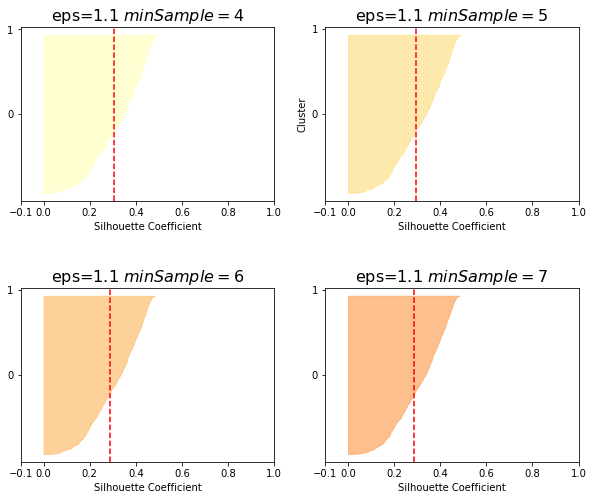

****************************************************************************************************************************************************************


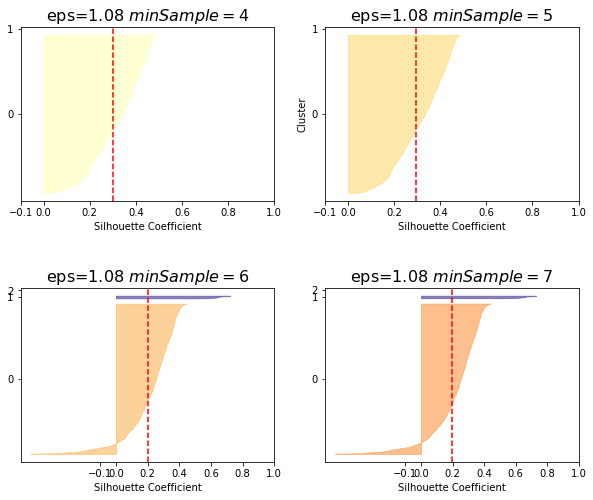

****************************************************************************************************************************************************************


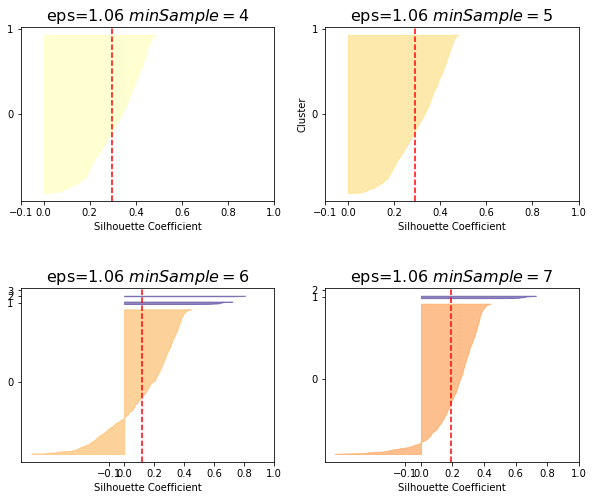

****************************************************************************************************************************************************************


In [ ]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

#we wil shows eps and min-point's performance in the silhouette coefficient graph
# using the manhattan distance method
# We can check the data pairs of the top higher scores with more than 2 clusters:
# {eps , min-points} :  {1.1,3}{1.08,3}{1.08,6}{1.08,7}{1.06,3}{1.06,6}{1.06,7}

def plot_dbscan_SCP(dbscan_per_k,title):
    plt.figure(figsize=(10, 8))
    

    for k in (4,5,6,7):
        plt.subplot(2, 2, k -3)
        plt.subplots_adjust(hspace=0.5)
        
        y_pred = dbscan_per_k[k - 3].labels_
        silhouette_coefficients = silhouette_samples(tr_pca, y_pred,metric='manhattan')

        padding = tr_pca.shape[0] // 30
        pos = padding
        ticks = []
        for i in range(k):
            coeffs = silhouette_coefficients[y_pred == i]
            coeffs.sort()

            color = plt.cm.Spectral(i+2 / k)
            plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                            facecolor=color, edgecolor=color, alpha=0.7)
            ticks.append(pos + len(coeffs) // 2)
            pos += len(coeffs) + padding

        plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
        plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
        if k in (3, 5):
            plt.ylabel('Cluster')

        if k in (4,5,6,7):
            # plt.title(title)
            plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
            plt.xlabel("Silhouette Coefficient")
        else:
            plt.tick_params(labelbottom=False)

        silhouette_scores = [silhouette_score(tr_pca, model.labels_,metric='manhattan')
                    for model in dbscan_per_k[:]]

        plt.axvline(x=silhouette_scores[k - 3], color="red", linestyle="--")
        plt.title(title+" $minSample={}$".format(k), fontsize=16)
    #plt.title(title)
    plt.show()
    print('*'*160)



dbscan_per_iter_06 = [DBSCAN(eps=1.1, min_samples=min_sample_,metric='manhattan').fit(tr_pca)
                for min_sample_ in min_sample_list]

dbscan_per_iter_58 = [DBSCAN(eps=1.08, min_samples=min_sample_,metric='manhattan').fit(tr_pca)
                for min_sample_ in min_sample_list]
dbscan_per_iter_54 = [DBSCAN(eps=1.06, min_samples=min_sample_,metric='manhattan').fit(tr_pca)
                for min_sample_ in min_sample_list]
print('manhattan distance model')
plot_dbscan_SCP(dbscan_per_iter_06,'eps=1.1')
plot_dbscan_SCP(dbscan_per_iter_58,'eps=1.08')
plot_dbscan_SCP(dbscan_per_iter_54,'eps=1.06')


chebyshev distance model


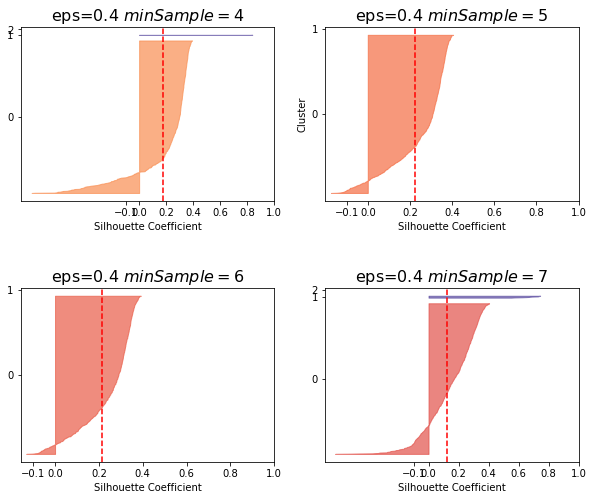

****************************************************************************************************************************************************************


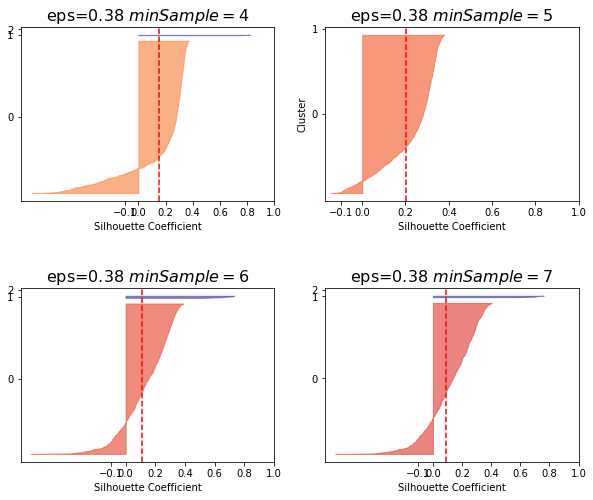

****************************************************************************************************************************************************************


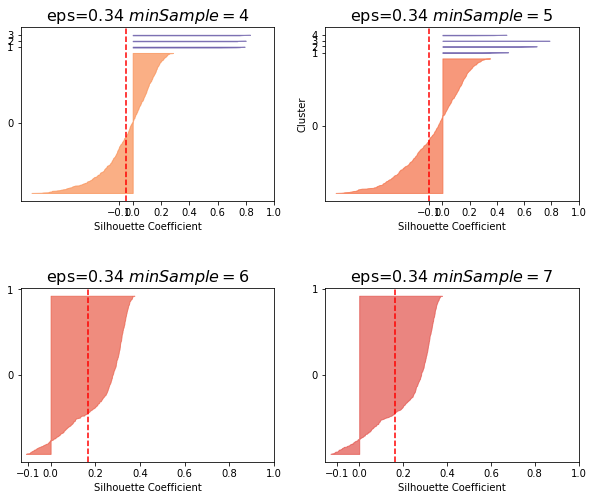

****************************************************************************************************************************************************************


In [ ]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

#we wil shows eps and min-point's performance in the silhouette coefficient graph
# using the chebyshev distance method
# We can check the data pairs of the top higher scores with more than 2 clusters:
# {eps , min-points} :  {0.4,3}{0.3,4}{0.4,7}{0.38,3}

def plot_dbscan_SCP(dbscan_per_k,title):
    plt.figure(figsize=(10, 8))
    

    for k in (4,5,6,7):
        plt.subplot(2, 2, k -3)
        plt.subplots_adjust(hspace=0.5)
        
        y_pred = dbscan_per_k[k - 3].labels_
        silhouette_coefficients = silhouette_samples(tr_pca, y_pred,metric='chebyshev')

        padding = tr_pca.shape[0] // 30
        pos = padding
        ticks = []
        for i in range(k):
            coeffs = silhouette_coefficients[y_pred == i]
            coeffs.sort()

            color = plt.cm.Spectral(i+1 / k)
            plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                            facecolor=color, edgecolor=color, alpha=0.7)
            ticks.append(pos + len(coeffs) // 2)
            pos += len(coeffs) + padding

        plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
        plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
        if k in (3, 5):
            plt.ylabel('Cluster')

        if k in (4,5,6,7):
            # plt.title(title)
            plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
            plt.xlabel("Silhouette Coefficient")
        else:
            plt.tick_params(labelbottom=False)

        silhouette_scores = [silhouette_score(tr_pca, model.labels_,metric='chebyshev')
                    for model in dbscan_per_k[:]]

        plt.axvline(x=silhouette_scores[k - 3], color="red", linestyle="--")
        plt.title(title+" $minSample={}$".format(k), fontsize=16)
    #plt.title(title)
    plt.show()
    print('*'*160)



dbscan_per_iter_06 = [DBSCAN(eps=0.4, min_samples=min_sample_,metric='chebyshev').fit(tr_pca)
                for min_sample_ in min_sample_list]

dbscan_per_iter_58 = [DBSCAN(eps=0.38, min_samples=min_sample_,metric='chebyshev').fit(tr_pca)
                for min_sample_ in min_sample_list]
dbscan_per_iter_54 = [DBSCAN(eps=0.34, min_samples=min_sample_,metric='chebyshev').fit(tr_pca)
                for min_sample_ in min_sample_list]
print('chebyshev distance model')
plot_dbscan_SCP(dbscan_per_iter_06,'eps=0.4')
plot_dbscan_SCP(dbscan_per_iter_58,'eps=0.38')
plot_dbscan_SCP(dbscan_per_iter_54,'eps=0.34')


In [ ]:
# According to graph we choose eps=0.58 min-points=7 with euclidean distance method

## 4.2 ICMLA Dataset

### Train DBSCAN clustering 

In [ ]:
###Synopsis data preprocessing
import nltk
from nltk.stem.snowball import SnowballStemmer
import re #regular expressions
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

stemmer = SnowballStemmer("english")
nltk.download('punkt')
def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

# combine 3 columns into one column
ICMLA_df['combined']=ICMLA_df.apply(lambda x:'%s _ %s _ %s' % (x['paper_title'],x['author_keywords'],x['abstract']),axis=1)
ICMLA_X=ICMLA_df['combined']

tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=20000,
                                 min_df=1, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,3))

tfidf_matrix = tfidf_vectorizer.fit_transform(ICMLA_X)

ICMLA_Y=ICMLA_df['session']
ICMLA_Y_unique=ICMLA_Y.unique()
print('The number of clusters',ICMLA_Y_unique.shape)
tfidf_matrix
# X_ICMLA_train, X_ICMLA_test, y_ICMLA_train, y_ICMLA_test = train_test_split( tfidf_matrix, ICMLA_Y, test_size=0.33, random_state=42)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


The number of clusters (24,)


<105x20000 sparse matrix of type '<class 'numpy.float64'>'
	with 25361 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.cluster import DBSCAN

# According to evaluation, we choose eps=0.58 min-points=7 with euclidean distance method for better performance

dbscan = DBSCAN(eps=1.34, min_samples=2)
dbscan.fit(tfidf_matrix)
print(np.unique(dbscan.labels_))


# the plot just use previous two features of the PCA data to show the classfication
# plt.figure(figsize=(9, 3.2))
# plt.subplot(121)
# plot_dbscan(dbscan, tfidf_matrix, size=100)
# plt.show()

[-1  0  1  2  3  4  5  6  7  8  9 10 11]


In [ ]:
tfidf_matrix

In [ ]:
tfidf_matrix.shape

(105, 20000)

### First evaluation 

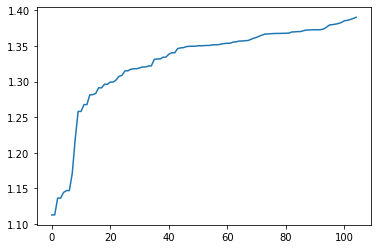

In [ ]:
#reference of DBSCAN Python Example: The Optimal Value For Epsilon (EPS)
#https://towardsdatascience.com/machine-learning-clustering-dbscan-determine-the-optimal-value-for-epsilon-eps-python-example-3100091cfbc

# using the euclidean distance method
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2,metric='euclidean')
nbrs = neigh.fit(tfidf_matrix)
distances, indices = nbrs.kneighbors(tfidf_matrix)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [ ]:
from sklearn.metrics import silhouette_score
# using the euclidean distance method

eps_list=np.arange(1.26,1.36,0.02)

min_sample_list=[2,3,4]

def silhouette_dbscan_SC(eps_):
    dbscan_per_iter = [DBSCAN(eps=eps_, min_samples=min_sample_,metric='euclidean').fit(tfidf_matrix)
                for min_sample_ in min_sample_list]
    silhouette_scores = [silhouette_score(tfidf_matrix, model.labels_,metric='euclidean')
                     for model in dbscan_per_iter[:]]
    return silhouette_scores

silhouette_scores_array=[]
for eps in eps_list:
    silhouette_scores_item=silhouette_dbscan_SC(eps)
    silhouette_scores_array.append(silhouette_scores_item)

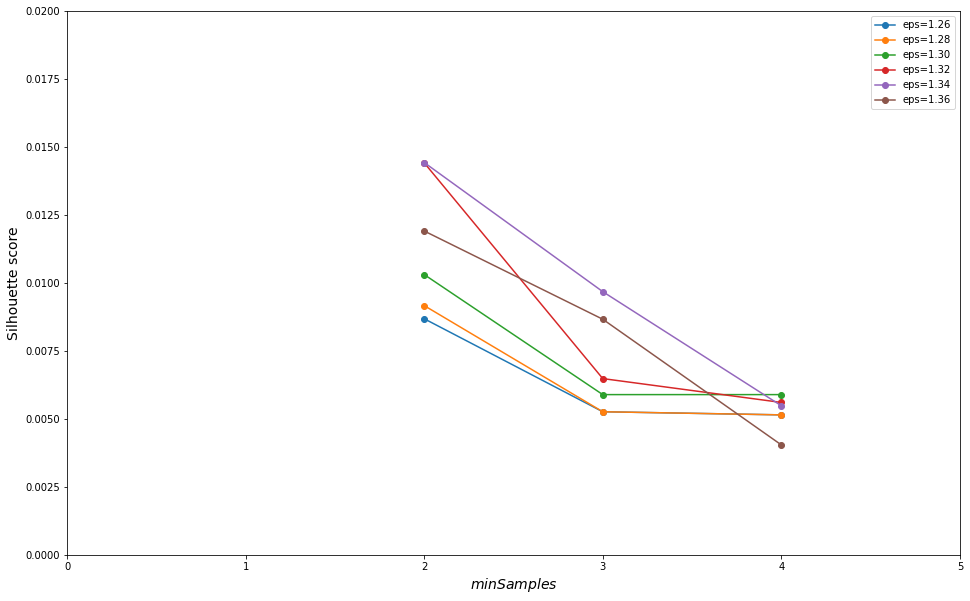

In [ ]:
# plot the performance of different measures
# using the euclidean distance method
plt.figure(figsize=(16, 10))
for i,silhouette_scores_item in enumerate(silhouette_scores_array):
    plt.plot(range(2,5), silhouette_scores_item,'o-')


plt.xlabel("$minSamples$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([0, 5,0, 0.02])

# plt.annotate('higher SC',
#              xy=(24, silhouette_scores[-1]),
#              xytext=(0.55, 0.75),
#              textcoords='figure fraction',
#              fontsize=16,
#              arrowprops=dict(facecolor='black', shrink=0.1)
#             )
plt.legend(['eps={:.2f}'.format(i) for i in eps_list ])
plt.show()

In [ ]:
Z# using the euclidean distance method
def num_k_dbscan(eps_,min_sample_):
    dbscan = DBSCAN(eps=eps_, min_samples=min_sample_,metric='euclidean')
    dbscan.fit(tfidf_matrix.toarray())
    print('eps={},min_sample={},cluster_num={}'.format(eps_,min_sample_,np.unique(dbscan.labels_)))

for eps in [1.34,1.32]:
    for min_sampel in [2,3]:
        num_k_dbscan(eps,min_sampel)

eps=1.34,min_sample=2,cluster_num=[-1  0  1  2  3  4  5  6  7  8  9 10 11]
eps=1.34,min_sample=3,cluster_num=[-1  0  1  2  3  4  5]
eps=1.32,min_sample=2,cluster_num=[-1  0  1  2  3  4  5  6  7  8  9 10]
eps=1.32,min_sample=3,cluster_num=[-1  0  1  2  3  4]


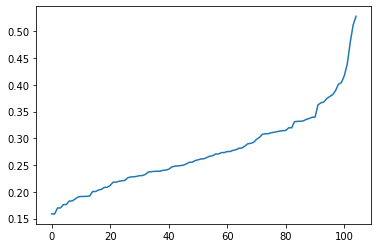

In [ ]:
#reference of DBSCAN Python Example: The Optimal Value For Epsilon (EPS)
#https://towardsdatascience.com/machine-learning-clustering-dbscan-determine-the-optimal-value-for-epsilon-eps-python-example-3100091cfbc

# using the euclidean distance method
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2,metric='chebyshev')
nbrs = neigh.fit(tfidf_matrix.toarray())
distances, indices = nbrs.kneighbors(tfidf_matrix.toarray())
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [ ]:
from sklearn.metrics import silhouette_score
# using the euclidean distance method

eps_list=np.arange(0.26,0.38,0.02)

min_sample_list=[2,3,4,5,6,7,8]

def silhouette_dbscan_SC(eps_):
    dbscan_per_iter = [DBSCAN(eps=eps_, min_samples=min_sample_,metric='chebyshev').fit(tfidf_matrix.toarray())
                for min_sample_ in min_sample_list]
    silhouette_scores = [silhouette_score(tfidf_matrix.toarray(), model.labels_,metric='chebyshev')
                     for model in dbscan_per_iter[:]]
    return silhouette_scores

silhouette_scores_array=[]
for eps in eps_list:
    silhouette_scores_item=silhouette_dbscan_SC(eps)
    silhouette_scores_array.append(silhouette_scores_item)

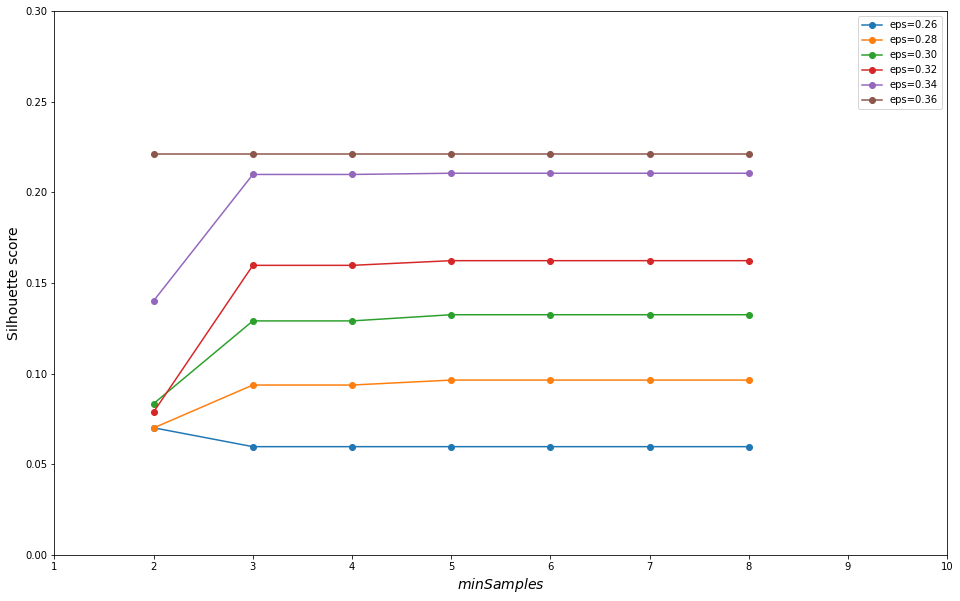

In [ ]:
# plot the performance of different measures
# using the euclidean distance method
plt.figure(figsize=(16, 10))
for i,silhouette_scores_item in enumerate(silhouette_scores_array):
    plt.plot(range(2,9), silhouette_scores_item,'o-')


plt.xlabel("$minSamples$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1, 10,0, 0.3])

# plt.annotate('higher SC',
#              xy=(24, silhouette_scores[-1]),
#              xytext=(0.55, 0.75),
#              textcoords='figure fraction',
#              fontsize=16,
#              arrowprops=dict(facecolor='black', shrink=0.1)
#             )
plt.legend(['eps={:.2f}'.format(i) for i in eps_list ])
plt.show()

In [ ]:
# using the euclidean distance method
def num_k_dbscan(eps_,min_sample_):
    dbscan = DBSCAN(eps=eps_, min_samples=min_sample_,metric='chebyshev')
    dbscan.fit(tfidf_matrix.toarray())
    print('eps={},min_sample={},cluster_num={}'.format(eps_,min_sample_,np.unique(dbscan.labels_)))

for eps in [0.34,0.36,0.32]:
    for min_sampel in [2,3,4]:
        num_k_dbscan(eps,min_sampel)


eps=0.34,min_sample=2,cluster_num=[-1  0  1]
eps=0.34,min_sample=3,cluster_num=[-1  0]
eps=0.34,min_sample=4,cluster_num=[-1  0]
eps=0.36,min_sample=2,cluster_num=[-1  0]
eps=0.36,min_sample=3,cluster_num=[-1  0]
eps=0.36,min_sample=4,cluster_num=[-1  0]
eps=0.32,min_sample=2,cluster_num=[-1  0  1  2]
eps=0.32,min_sample=3,cluster_num=[-1  0]
eps=0.32,min_sample=4,cluster_num=[-1  0]


In [ ]:
#eps=0.34,min_sample=2,cluster_num=[-1  0  1] and eps=0.32,min_sample=2,cluster_num=[-1  0  1  2] have feasible performance

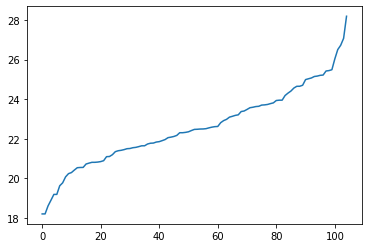

In [ ]:
#reference of DBSCAN Python Example: The Optimal Value For Epsilon (EPS)
#https://towardsdatascience.com/machine-learning-clustering-dbscan-determine-the-optimal-value-for-epsilon-eps-python-example-3100091cfbc

# using the euclidean distance method
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2,metric='manhattan')
nbrs = neigh.fit(tfidf_matrix.toarray())
distances, indices = nbrs.kneighbors(tfidf_matrix.toarray())
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [ ]:
from sklearn.metrics import silhouette_score
# using the euclidean distance method

eps_list=np.arange(23,26,0.5)

min_sample_list=[2,3,4,5,6,7,8]

def silhouette_dbscan_SC(eps_):
    dbscan_per_iter = [DBSCAN(eps=eps_, min_samples=min_sample_,metric='manhattan').fit(tfidf_matrix.toarray())
                for min_sample_ in min_sample_list]
    silhouette_scores = [silhouette_score(tfidf_matrix.toarray(), model.labels_,metric='manhattan')
                     for model in dbscan_per_iter[:]]
    return silhouette_scores

silhouette_scores_array=[]
for eps in eps_list:
    silhouette_scores_item=silhouette_dbscan_SC(eps)
    silhouette_scores_array.append(silhouette_scores_item)

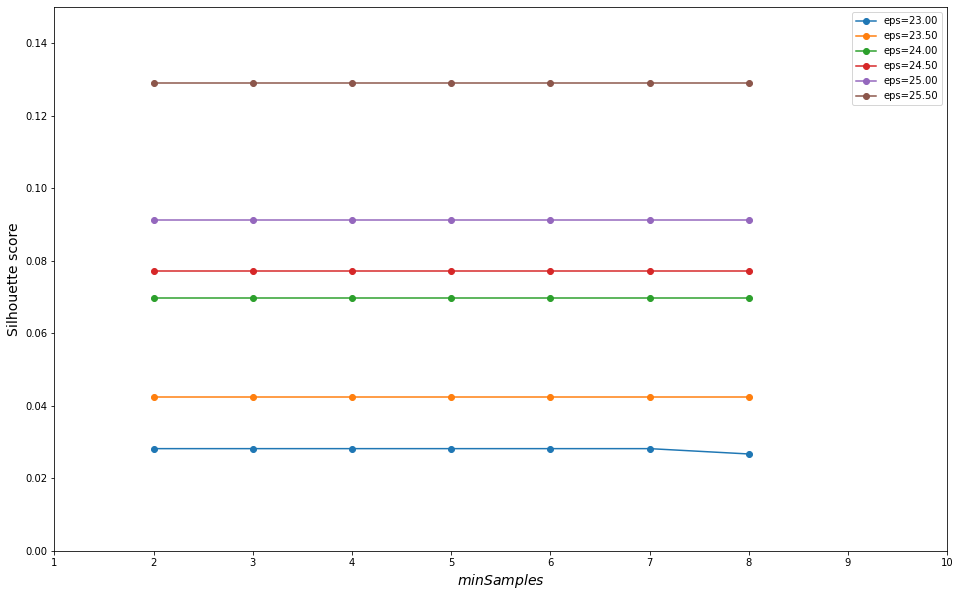

In [ ]:
# plot the performance of different measures
# using the euclidean distance method
plt.figure(figsize=(16, 10))
for i,silhouette_scores_item in enumerate(silhouette_scores_array):
    plt.plot(range(2,9), silhouette_scores_item,'o-')


plt.xlabel("$minSamples$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1, 10,0, 0.15])

# plt.annotate('higher SC',
#              xy=(24, silhouette_scores[-1]),
#              xytext=(0.55, 0.75),
#              textcoords='figure fraction',
#              fontsize=16,
#              arrowprops=dict(facecolor='black', shrink=0.1)
#             )
plt.legend(['eps={:.2f}'.format(i) for i in eps_list ])
plt.show()

In [ ]:
# using the euclidean distance method
def num_k_dbscan(eps_,min_sample_):
    dbscan = DBSCAN(eps=eps_, min_samples=min_sample_,metric='manhattan')
    dbscan.fit(tfidf_matrix.toarray())
    print('eps={},min_sample={},cluster_num={}'.format(eps_,min_sample_,np.unique(dbscan.labels_)))

for eps in [25.5,25,24.5,24,23.5,23]:
    for min_sampel in [2,3,4]:
        num_k_dbscan(eps,min_sampel)


eps=25.5,min_sample=2,cluster_num=[-1  0]
eps=25.5,min_sample=3,cluster_num=[-1  0]
eps=25.5,min_sample=4,cluster_num=[-1  0]
eps=25,min_sample=2,cluster_num=[-1  0]
eps=25,min_sample=3,cluster_num=[-1  0]
eps=25,min_sample=4,cluster_num=[-1  0]
eps=24.5,min_sample=2,cluster_num=[-1  0]
eps=24.5,min_sample=3,cluster_num=[-1  0]
eps=24.5,min_sample=4,cluster_num=[-1  0]
eps=24,min_sample=2,cluster_num=[-1  0]
eps=24,min_sample=3,cluster_num=[-1  0]
eps=24,min_sample=4,cluster_num=[-1  0]
eps=23.5,min_sample=2,cluster_num=[-1  0]
eps=23.5,min_sample=3,cluster_num=[-1  0]
eps=23.5,min_sample=4,cluster_num=[-1  0]
eps=23,min_sample=2,cluster_num=[-1  0]
eps=23,min_sample=3,cluster_num=[-1  0]
eps=23,min_sample=4,cluster_num=[-1  0]


In [ ]:
#It can't cluster the data just only one cluster

### Second evaluation 

In [ ]:
from sklearn import metrics
dbscan = DBSCAN(eps=1.34, min_samples=2)
dbscan.fit(tfidf_matrix)
labels_true=np.unique(ICMLA_df['session'],return_inverse=True)[1]
metrics.adjusted_rand_score(ICMLA_df['session'], dbscan.labels_)

0.010521335199387244

In [ ]:
dbscan = DBSCAN(eps=25.5, min_samples=3,metric='manhattan')
dbscan.fit(tfidf_matrix)
metrics.adjusted_rand_score(labels_true, dbscan.labels_)

-0.000516268157904959

In [ ]:
dbscan = DBSCAN(eps=0.34, min_samples=3,metric='chebyshev')
dbscan.fit(tfidf_matrix.toarray())
metrics.adjusted_rand_score(labels_true, dbscan.labels_)

-0.00013804258947860092

In [ ]:
dbscan.labels_

array([-1,  0,  1,  2, -1,  3, -1, -1,  4, -1,  2,  2, -1,  2,  3, -1, -1,
       -1, -1, -1,  2, -1,  2, -1,  2,  2,  5,  2, -1,  2,  1, -1, -1,  6,
        7, -1, -1, -1, -1,  4,  8,  3, -1, -1, -1, -1, -1, -1, -1, -1,  0,
        8, -1, -1, -1, -1,  9, -1,  6, -1, -1, -1, -1, 10, -1, -1, 10, -1,
       11, -1, -1, -1, -1,  1, -1, -1, -1,  5, -1, 11,  0, -1, -1, -1, -1,
       -1, -1,  2,  7,  9,  9, -1,  9, -1, -1, -1,  1, 10, -1, -1, -1, -1,
       -1, -1,  2])

In [ ]:
# only chebyshev distance has higher silhouette score
# we draw the silhouette graph with seleted eps and min-points 

Euclidean distance model


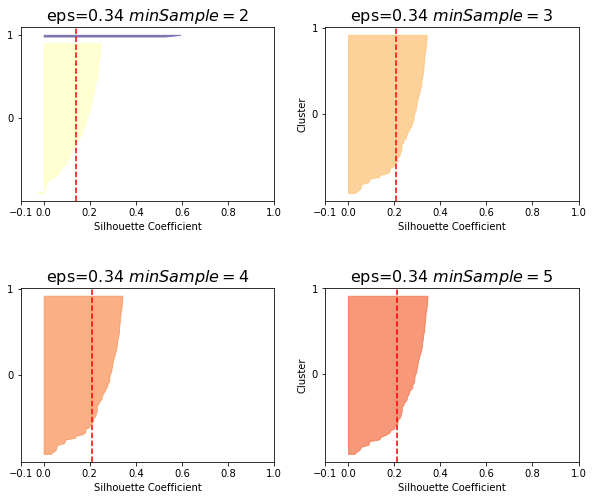

****************************************************************************************************************************************************************


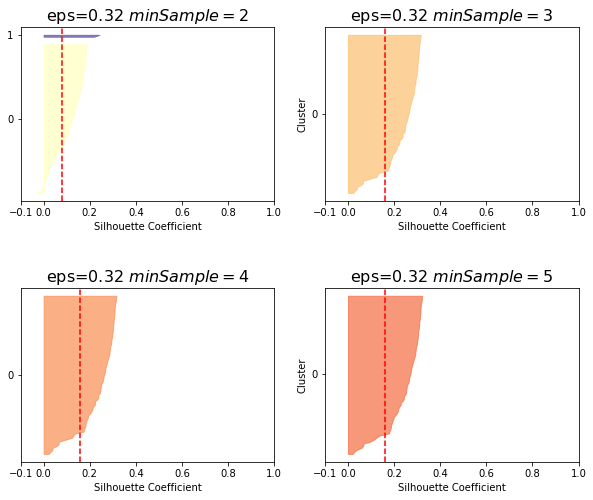

****************************************************************************************************************************************************************


In [ ]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter


# using the chebyshev distance method
# We can check the data pairs of the top higher scores with more than 2 clusters:
# {eps , min-points} :  {0.6,7}{0.58,4}{0.58,7}{0.54,5}{0.54,6}{0.54,7}{0.52,5}{0.52,6}
min_sample_list=[2,3,4,5]

def plot_dbscan_SCP(dbscan_per_k,title):
    plt.figure(figsize=(10, 8))
    

    for k in (2,3,4,5):
        plt.subplot(2, 2, k -1)
        plt.subplots_adjust(hspace=0.5)
        
        y_pred = dbscan_per_k[k - 2].labels_
        
        silhouette_coefficients = silhouette_samples(tfidf_matrix.toarray(), y_pred,metric='chebyshev')

        padding = tfidf_matrix.shape[0] // 30
    
        pos = padding
        ticks = []
        for i in range(k):
            coeffs = silhouette_coefficients[y_pred == i]
            coeffs.sort()

            color = plt.cm.Spectral(i+1 / k)
            plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                            facecolor=color, edgecolor=color, alpha=0.7)
            ticks.append(pos + len(coeffs) // 2)
            pos += len(coeffs) + padding

        plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
        plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
        if k in (3, 5):
            plt.ylabel('Cluster')

        if k in (2,3,4,5):
            # plt.title(title)
            plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
            plt.xlabel("Silhouette Coefficient")
        else:
            plt.tick_params(labelbottom=False)

        silhouette_scores = [silhouette_score(tfidf_matrix.toarray(), model.labels_,metric='chebyshev')
                    for model in dbscan_per_k[:]]

        plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
        plt.title(title+" $minSample={}$".format(k), fontsize=16)
    #plt.title(title)
    plt.show()
    print('*'*160)



dbscan_per_iter_034 = [DBSCAN(eps=0.34, min_samples=min_sample_,metric='chebyshev').fit(tfidf_matrix.toarray())
                for min_sample_ in min_sample_list]

dbscan_per_iter_032 = [DBSCAN(eps=0.32, min_samples=min_sample_,metric='chebyshev').fit(tfidf_matrix.toarray())
                for min_sample_ in min_sample_list]

print('Euclidean distance model')
plot_dbscan_SCP(dbscan_per_iter_034,'eps=0.34')
plot_dbscan_SCP(dbscan_per_iter_032,'eps=0.32')
